<h1>Predicting Diamond Prices</h1>
<h2>Phase 1: Data Preparation & Visualisation</h2>
<h4>Group Name: Group 15</h4>
<h5>Name: Evelyn Lie (s3951140)</h5>
<h5>Name: Edward Lim Padmajaya (s3957503)</h5>
<h5>Name: Go Chee Kin (s3955624)</h5>
<h5>Name: Frandom Leo Inovejas (s3923193)</h5>

## Table of Contents
* [Introduction](#intro) 
  + [Dataset Source](#dataset-source)
  + [Dataset Details](#dataset-details)
  + [Dataset Variables](#dataset-variables)
  + [Response Variables](#response-variables)
* [Goals and Objectives](#goals-and-objectives)
* [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
* [Data Exploration and Visualisation](#data-exploration-and-visualisation)
* [Summary and Conclusion](#summary-and-conclusion)
* [References](#references)

<a id="intro"></a><h3><b>Introduction</b></h3>
<a id="dataset-source"></a><h4>Dataset Source</h4>
The Diamonds dataset used in study was obtained from a public repository on Github (Akman, 2022), which was also sourced from the ggplot2 R library. This dataset, which is used to forecast diamond prices, comprises details on diamonds such as their carat, clarity, cut, and color.
<a id="dataset-details"></a><h4>Dataset Details</h4>
The dataset is about the prices of diamonds and contains information about the diamond carat, clarity, cut, and colour of each diamond. Additional features included in this dataset are the total depth percentage, table, length of diamonds in millimetre, width of diamonds in millimetre, and depth of diamonds in millimetre. These features appear to be adequate for an attempt to predict the price of diamonds.

This dataset has a total of 10 features and 53940 observations.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [2]:
df_name = 'diamonds.csv'
df_url = 'https://raw.githubusercontent.com/akmand/datasets/main/diamonds.csv'
url_content = requests.get(df_url, verify = False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df.sample(10, random_state=999)

,carat,cut,color,clarity,depth,table,x,y,z,price
38848,0.40,Ideal,I,IF,62.2,56.0,4.75,4.71,2.94,1050
9023,1.04,Ideal,H,SI1,61.9,57.0,6.49,6.46,4.01,4515
51799,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59,2415
35562,0.35,Premium,G,VS1,61.2,58.0,4.54,4.51,2.77,906
18923,1.49,Very Good,G,SI2,62.5,58.0,7.20,7.26,4.52,7773
53847,0.71,Ideal,H,VVS1,60.8,56.0,5.75,5.83,3.52,2741
848,0.72,Ideal,H,VVS2,60.9,57.0,5.79,5.77,3.52,2869
9756,0.90,Premium,G,VS1,62.7,58.0,6.06,6.15,3.83,4661
15655,1.04,Premium,F,VS2,59.6,62.0,6.62,6.56,3.93,6278
3696,0.72,Very Good,G,VVS2,60.1,60.0,5.79,5.82,3.49,3449


<a id="dataset-variables"></a><h4>Dataset Variables</h4>

The features in our dataset are described in the table below and are taken from a RPubs website (Moreno, 2018) where the author also use the same diamonds dataset as our group.

In [3]:
from tabulate import tabulate

table = [
         ['Name', 'Data Type', 'Units', 'Descriptions'],
         ['Carat','Numerical','Carat','Weight of the diamond'],
         ['Cut','Ordinal Categorical','NA','Quality of the cut'],
         ['Color','Ordinal Categorical','NA','Colour of the diamond'],
         ['Clarity','Ordinal Categorical','NA','Measurement of how clear the diamond is'],
         ['Depth','Numerical','Percentage','Total depth percentage\n(Calculated by dividing the diamond’s total height by its total width)'],
         ['Table','Numerical','Percentage', 'Width of top of diamond relative to widest point\n(Calculated by dividing the total width of the diamond by the width of the table)'],
         ['x','Numerical','Millimetre','Length of diamond in millimetre'],
         ['y','Numerical','Millimetre','Width of diamond in millimetre'],
         ['z','Numerical','Millimetre','Depth of diamond in millimetre'],
         ['Price','Numerical','USD','Price of diamond in US Dollars'],
        ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤════════════╤═══════════════════════════════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units      │ Descriptions                                                                      │
╞═════════╪═════════════════════╪════════════╪═══════════════════════════════════════════════════════════════════════════════════╡
│ Carat   │ Numerical           │ Carat      │ Weight of the diamond                                                             │
├─────────┼─────────────────────┼────────────┼───────────────────────────────────────────────────────────────────────────────────┤
│ Cut     │ Ordinal Categorical │ NA         │ Quality of the cut                                                                │
├─────────┼─────────────────────┼────────────┼───────────────────────────────────────────────────────────────────────────────────┤
│ Color   │ Ordinal Categorical │ NA         │ Colour of the diamond               

<a id="response-variables"></a><h4>Response Variables</h4>

Predicting the price of diamonds in US dollars will be our primary feature in this project. All of the variables in this dataset will be included in the factors as all of them are relevant in predicting the price.

<a id="goals-and-objectives"></a><h3><b>Goals and Objectives</b></h3>
Diamonds have a variety of factors that affects their price. Any little change in one of the factors, increase or decrease, would instantly affect the price. Because of this, a customer should be able to know what factors that might effect the price of the diamond before making a purchase. Other than customers, diamond vendors could also use this prediction model to figure out how much they should charge for a diamond based on its variables.

Thus, predicting the diamond's price in US dollars based on available feature of the diamond is the main goal of this model. In addition, we will also perform some data cleaning and processing, as well as some data exploration and visualization using charts and graphs to gain some insights about the connections between the variables in the dataset, which is the purpose of this Phase 1 report. We will then be able to determine which feature appear to be the most accurate forecasters of the diamond price based on this connection.

<a id="data-cleaning-and-preprocessing"></a><h3><b>Data Cleaning and Preprocessing</b></h3>
This section describes the data cleaning and preprocessing procedures used for this project.
<h4>Data Cleaning</h4>
We examined the dataset for missing values and outliers and decide to remove rows where outliers are present based on the diamond's carat value, meaning for diamonds that are too heavy or light. The dataset provided does not include any missing value, meaning the dataset is complete and data value is stored for all the variables. Please note that all of the features in this dataset are relevant for predicting the price of the diamond as only a slight change will impact the price overall so we will not be dropping any features from this dataset. In addition, every features does not represent the same information as well.
<h4>Removing Outliers</h4>

There are a total of 1889 outlier diamonds in this dataset (See code below for calculation). These outliers represent diamonds which has a higher and lower carat than 1.5 times of the interquantile range. Figure 1 below illustrates the box plot to visualise the five-number summary: min, lower quartile, median, higher quartile, max, and the outliers present in the dataset.

In [4]:
print(df['carat'].describe())
quantile_1 = df['carat'].quantile(0.25)
quantile_3 = df['carat'].quantile(0.75)
iqr = quantile_3 - quantile_1
upper_whisker = quantile_3 + (1.5*iqr)
lower_whisker = quantile_1 - (1.5*iqr)

print('Upper Whisker: ', upper_whisker)
print('Lower Whisker: ', lower_whisker)
print('Number of Diamond Outliers: ', df[(df['carat'] < lower_whisker) | (df['carat'] > upper_whisker)]['carat'].shape[0])

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64
Upper Whisker:  2.0
Lower Whisker:  -0.5599999999999999
Number of Diamond Outliers:  1889


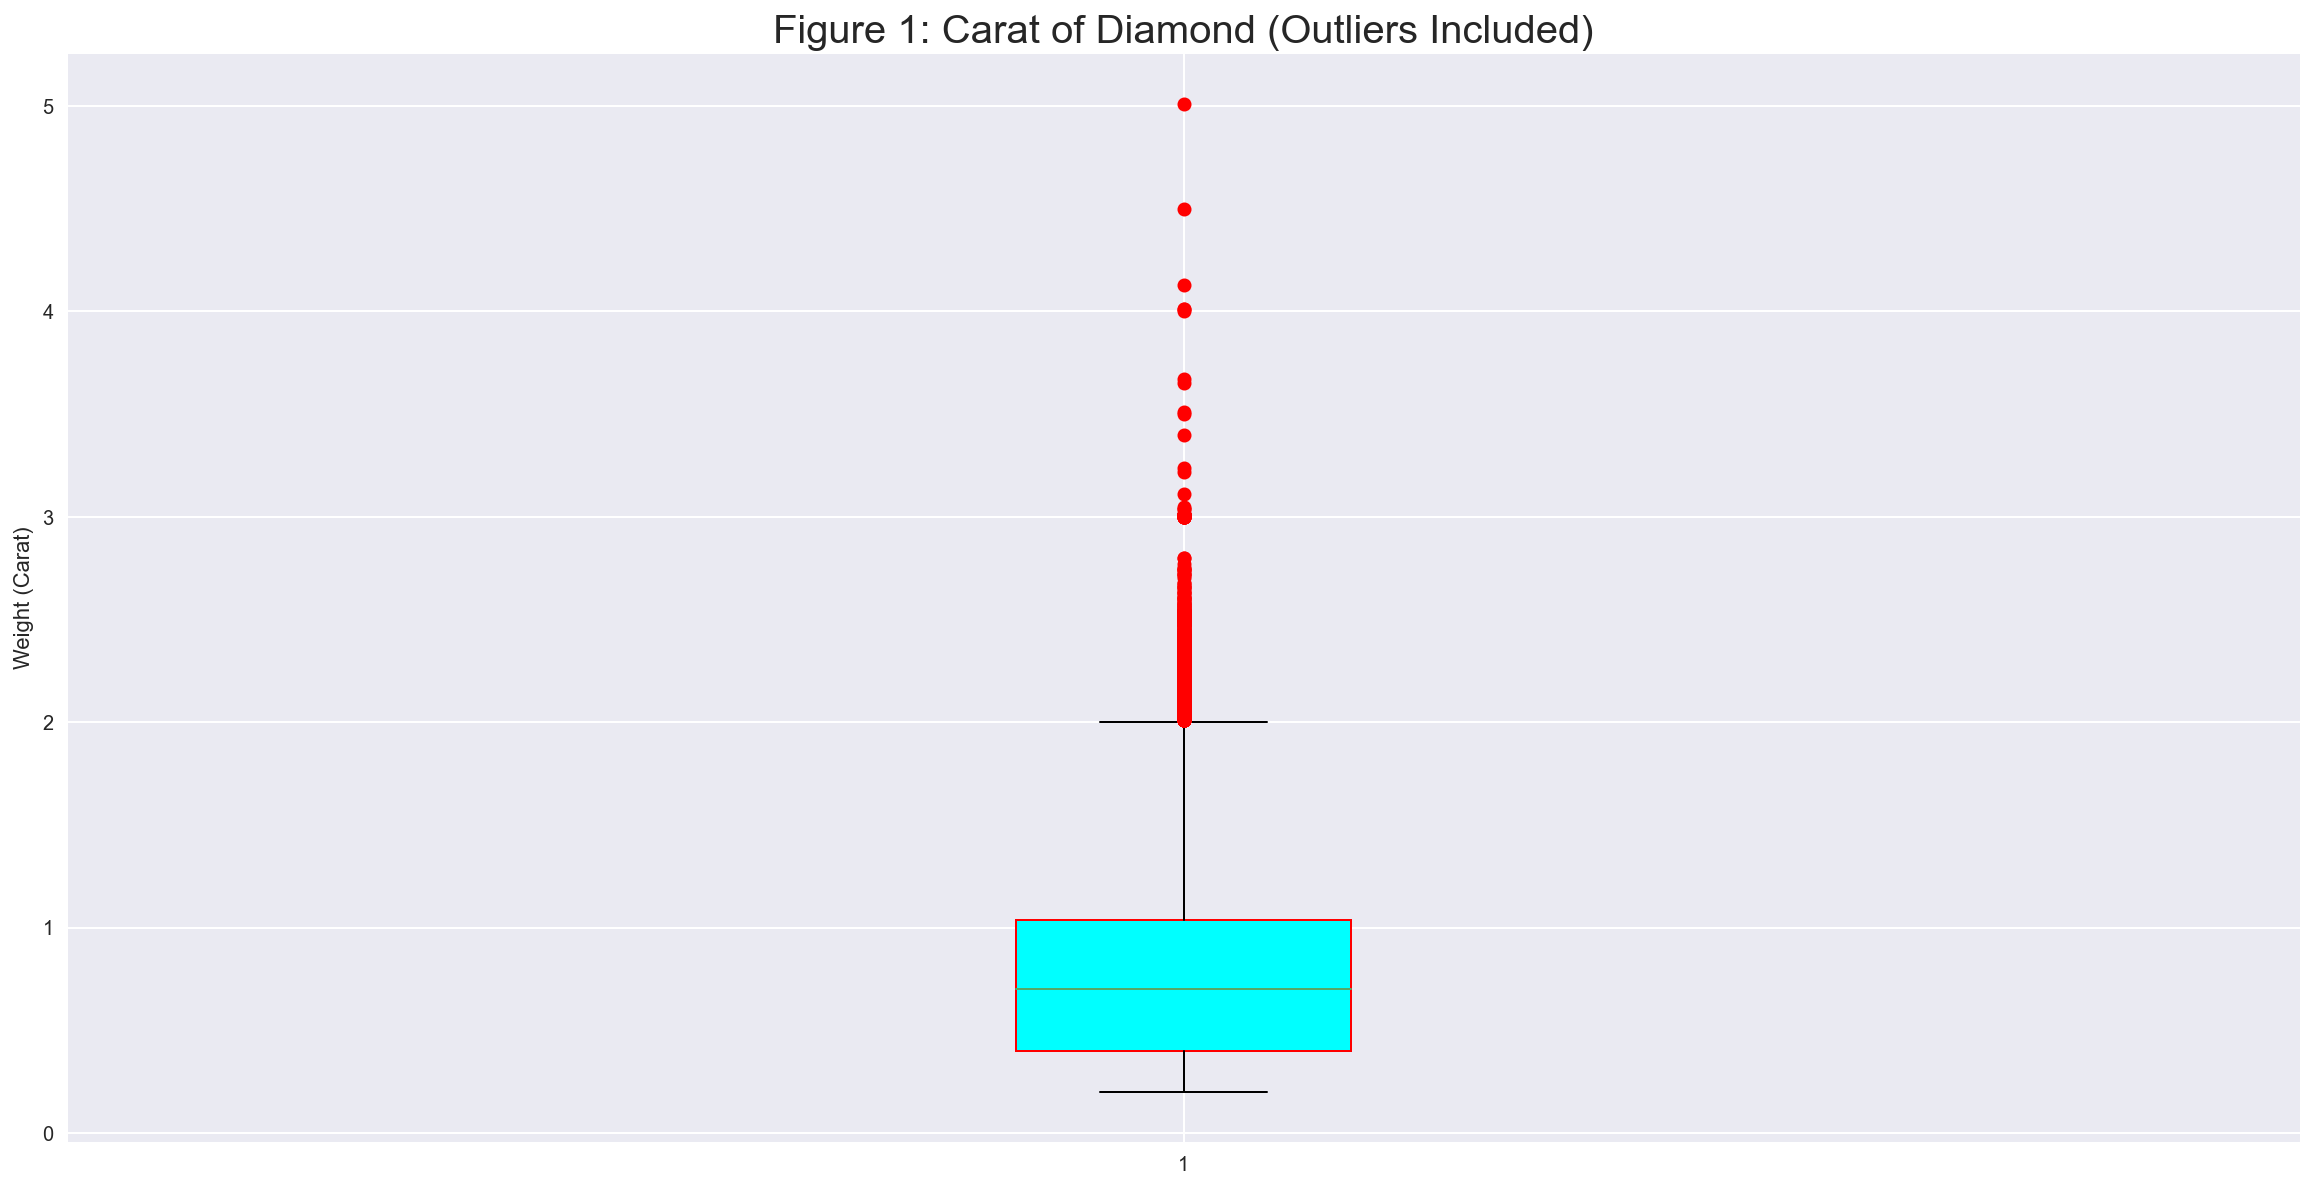

In [5]:
plt.figure(figsize = (20,10))
bp0 = plt.boxplot(df['carat'], 0, 'red', patch_artist=True)
plt.title('Figure 1: Carat of Diamond (Outliers Included)', fontsize = 20)

plt.ylabel('Weight (Carat)')

for box in bp0['boxes']:
    box.set(color='red', linewidth=1)
    box.set(facecolor='cyan')

plt.show()

Now, we will remove the outliers and assign the dataframe "carat" column with values that are not outliers.

In [6]:
df = df[(df['carat'] <= upper_whisker) & (df['carat'] >= lower_whisker)]
df.shape

(52051, 10)

Hence, the total number of records is now 52051 after 1889 records of outliers has been removed. Figure 2 below displays the box plot of the dataset which now has no outliers.

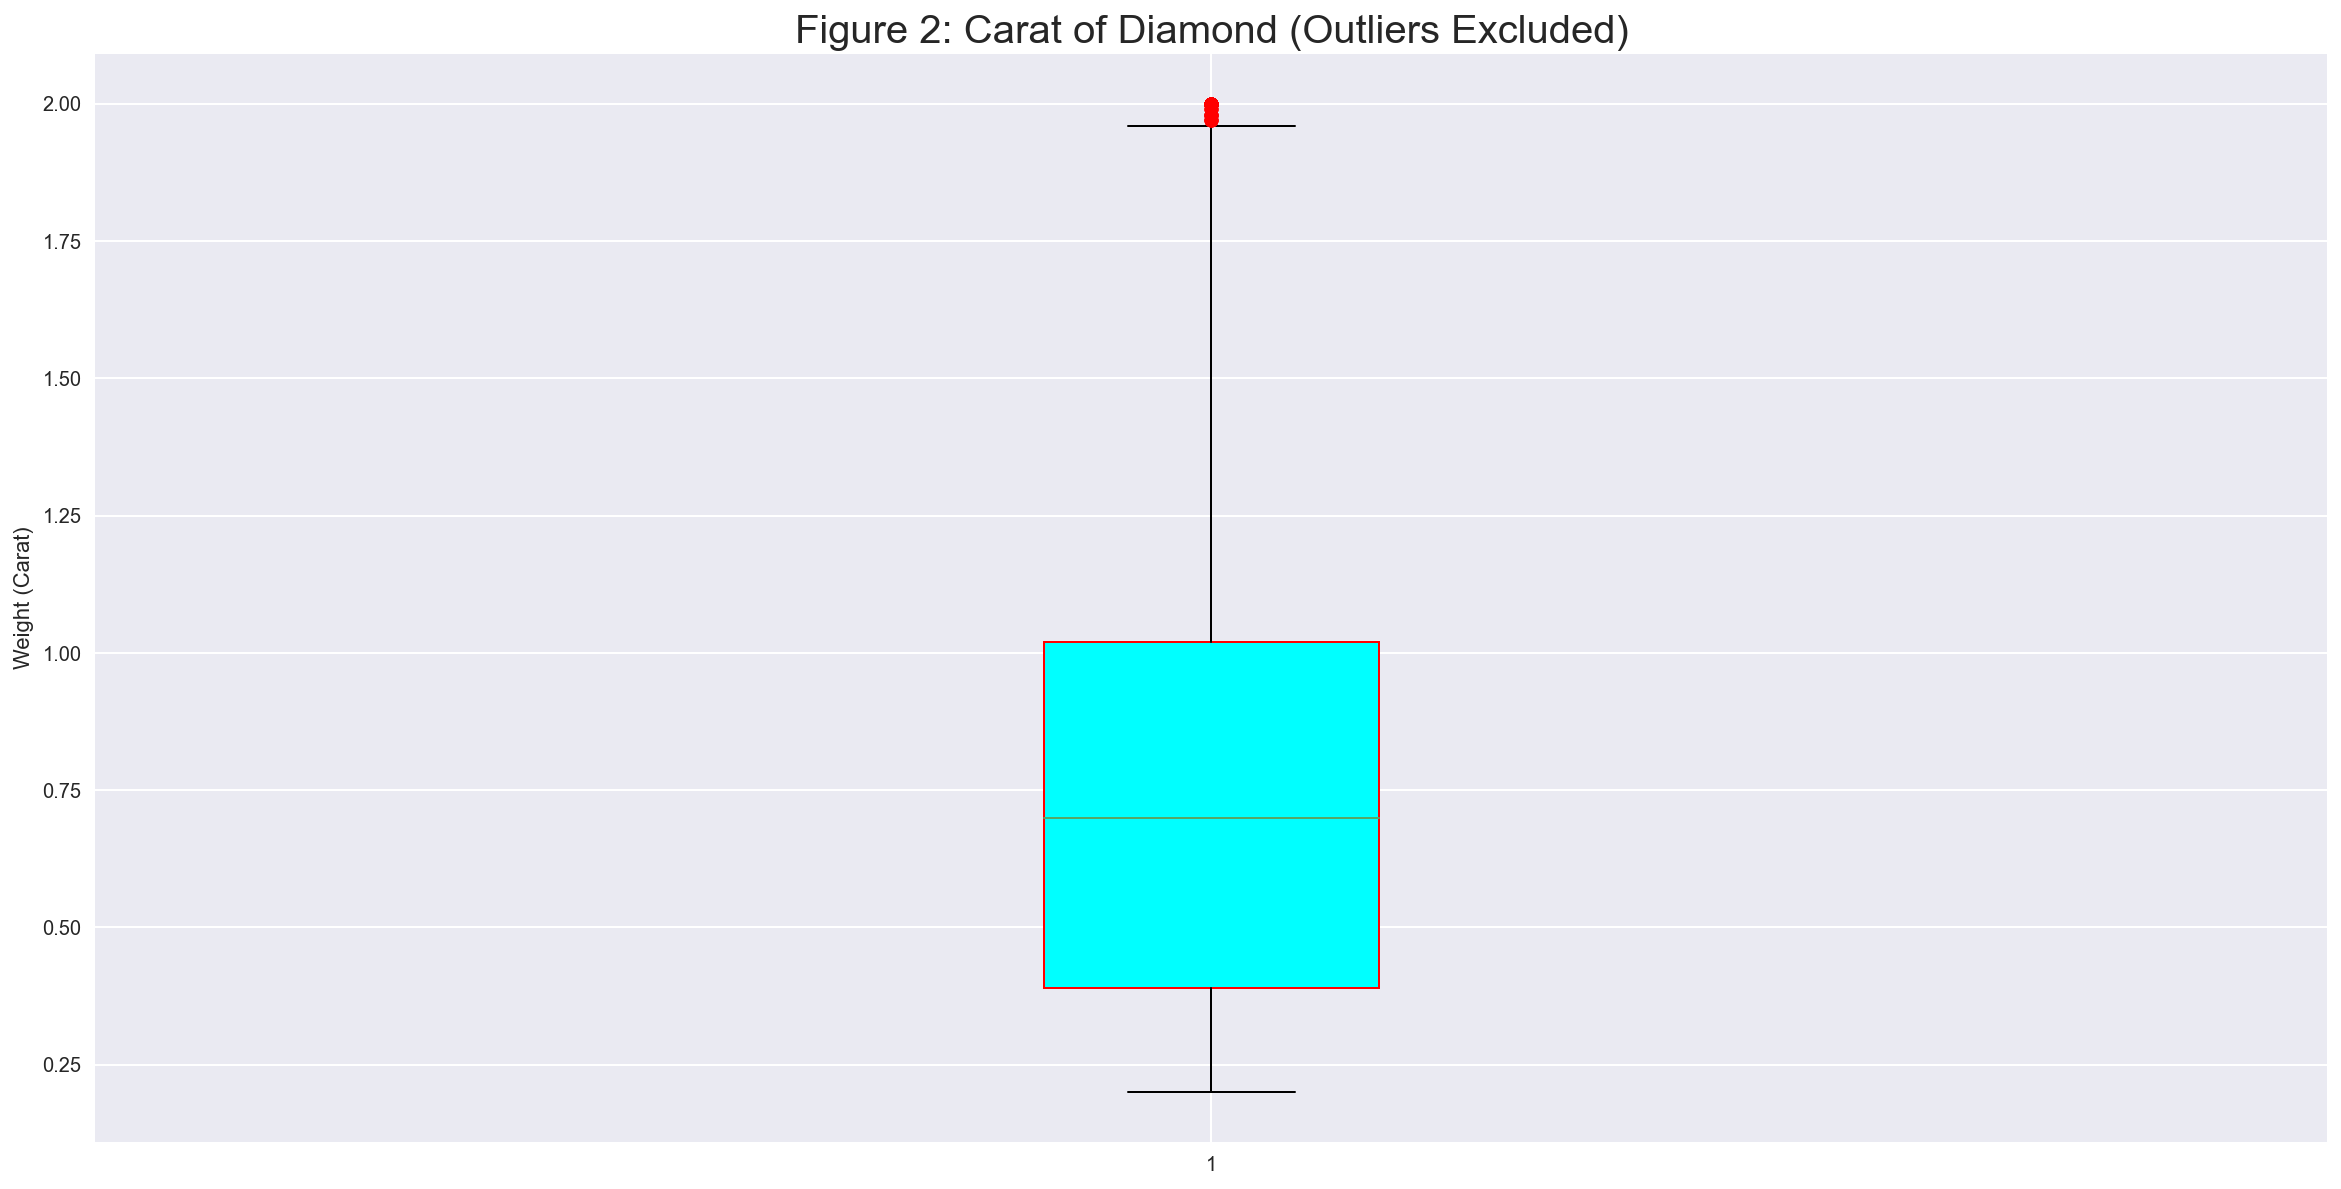

In [7]:
plt.figure(figsize = (20,10))
bp0 = plt.boxplot(df['carat'], 0, 'red', patch_artist=True)
plt.title('Figure 2: Carat of Diamond (Outliers Excluded)', fontsize = 20)

plt.ylabel('Weight (Carat)')

for box in bp0['boxes']:
    box.set(color='red', linewidth=1)
    box.set(facecolor='cyan')

plt.show()

<h5>Checking for Missing Values</h5>

In [8]:
print(f"\nNumber of missing values for each column:")
print(df.isnull().sum())


Number of missing values for each column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


There are no adjustments required in this data types because the data types of each feature match what we wanted it to be.

In [9]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


<h4>Random Sampling</h4>

As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 53940 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [10]:
df = df.sample(n=5000, random_state=999)
df.shape
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth,table,x,y,z,price
3677,0.70,Good,F,VVS2,62.5,58.0,5.68,5.75,3.57,3445
46558,0.51,Very Good,F,VS2,60.5,63.0,5.17,5.11,3.11,1781
16590,1.20,Premium,H,VS1,61.3,58.0,6.85,6.81,4.19,6626
45199,0.51,Ideal,E,VS2,62.6,55.0,5.08,5.11,3.19,1656
45123,0.77,Fair,D,SI2,65.1,63.0,5.71,5.65,3.70,1651


<a id="data-exploration-and-visualisation"></a><h3><b>Data Exploration and Visualisation</b></h3>

Now that our dataset has been deemed clean, we can begin visualising and examining each of the features.

<h4><b>Univariate Visualisation</b></h4>
<h5>HISTOGRAM OF CUT FREQUENCY</h5>

In the figure below, we count the total number of diamonds based on their cut quality to see which cut is has the highest frequency in a descending order and as a result, the "Ideal" cut has the highest frequency in the dataset, whereas the "Fair" quality cut is the lowest type. However, the figure also shows that the frequency for "Premium" and "Very Good" quality diamond cuts are about equal, with both of them in between the range of 1000 and 1500.

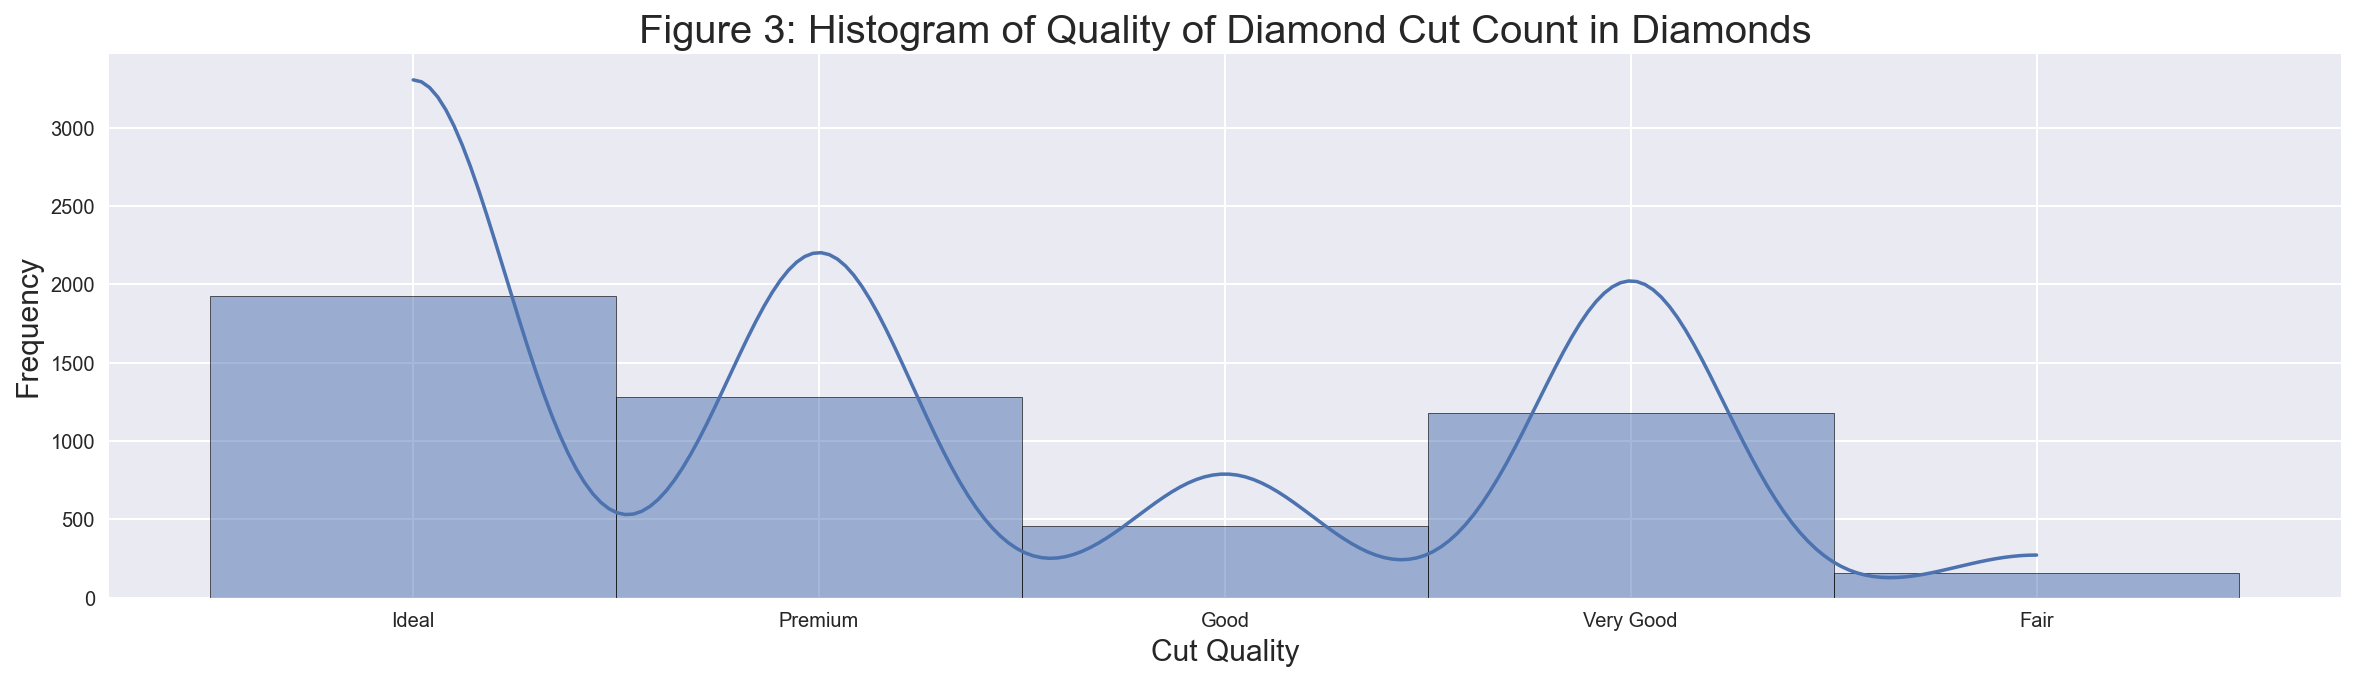

In [11]:
plt.figure(figsize = (20,5))
fig = sns.histplot(df['cut'], kde=True, bins=50).set_title('Figure 3: Quality of Diamond Cut Count in Diamonds', fontsize = 20)
fig = plt.title('Figure 3: Histogram of Quality of Diamond Cut Count in Diamonds', fontsize = 20)
plt.xlabel('Cut Quality', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

<h5>BAR CHART OF COLOUR FREQUENCY</h5>

The diamond's color is graded on a letter scale from "D" to "Z", with "D" being the best and "Z" being the worst. A diamond with a color grading scale of "D", "E", or "F" is considered as excellent and colorless, and it appears cold to the naked eye. On the other hand, the "G", "H", "I", and "J" colour grades are considered as "near colorless". The bar chart below displays the amount of diamonds for each color grade in the dataset.

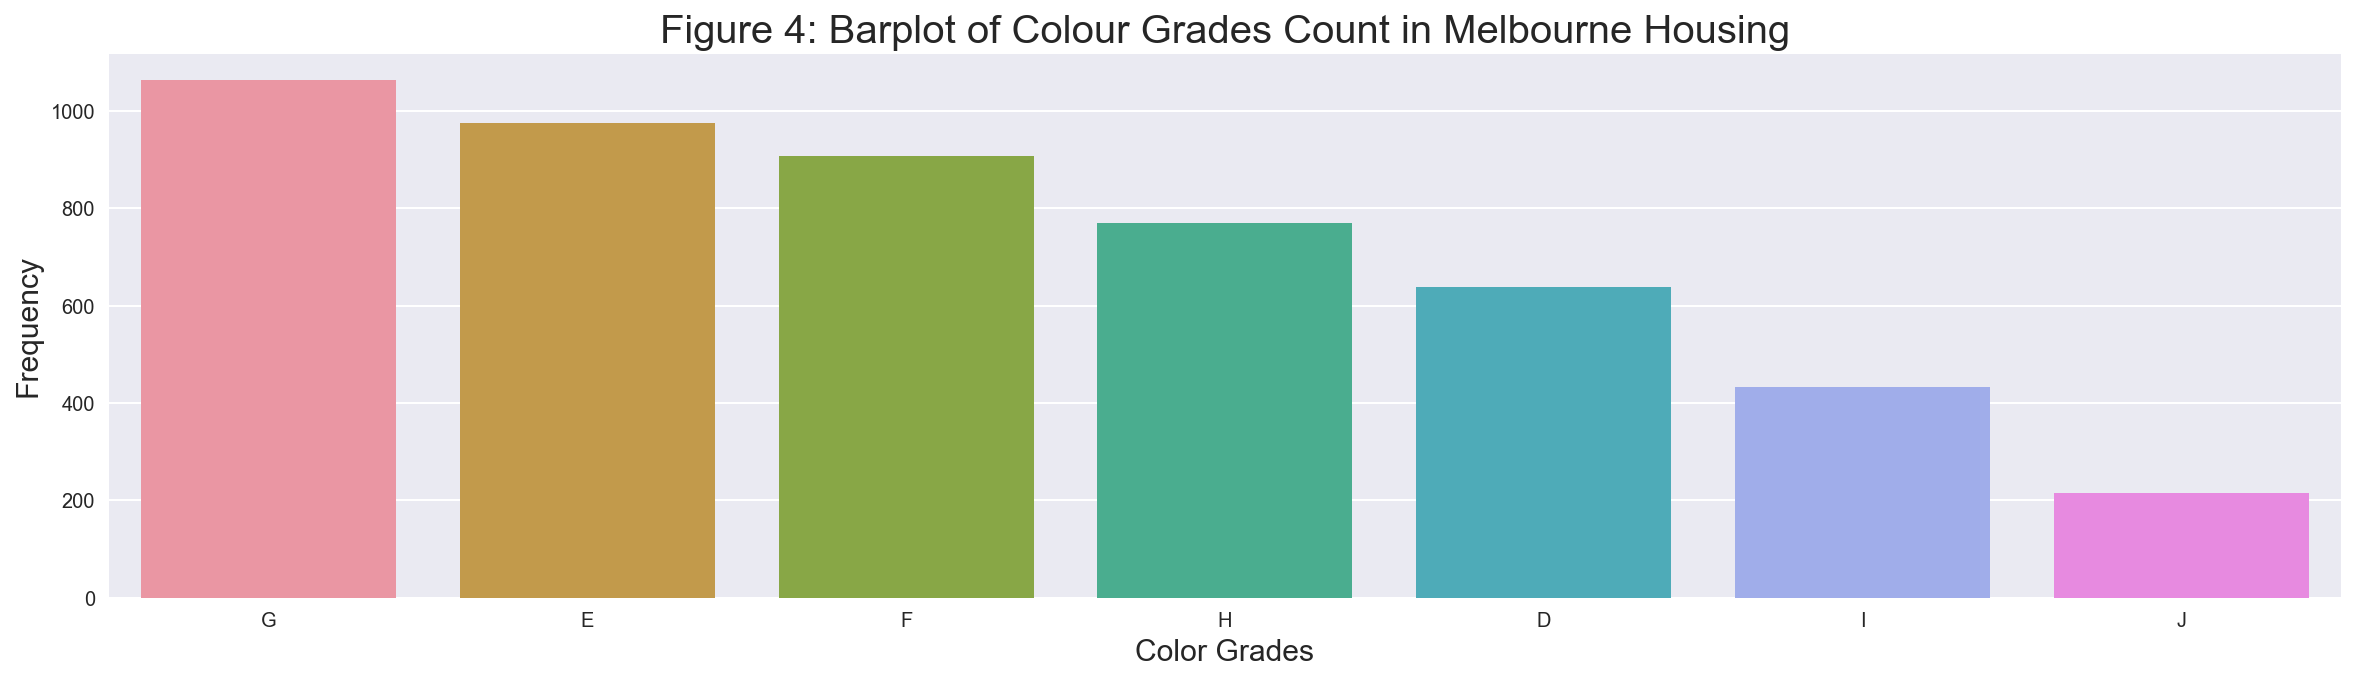

In [12]:
plt.figure(figsize = (20,5))
fig = sns.countplot(x = 'color', data = df, palette = None, order = df['color'].value_counts().index)
fig = plt.title('Figure 4: Barplot of Colour Grades Count in Melbourne Housing', fontsize = 20)
plt.xlabel('Color Grades', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

<h5>BAR CHART OF CLARITY FREQUENCY</h5>

All diamonds have imperfections, but a diamond's overall clarity is determined by the quantity of imperfections, combined with the type and position of inclusions. Crystals, pinpricks, needles, and other objects are examples of inclusion types. Either white carbon or black carbon can be an inclusion. A diamond clarity grade is used to categorise diamonds and the range of clarity grading ranges from perfect (FL) to included (I). The quantity of diamonds for each clarity grade in the dataset is shown in Figure 5 below.

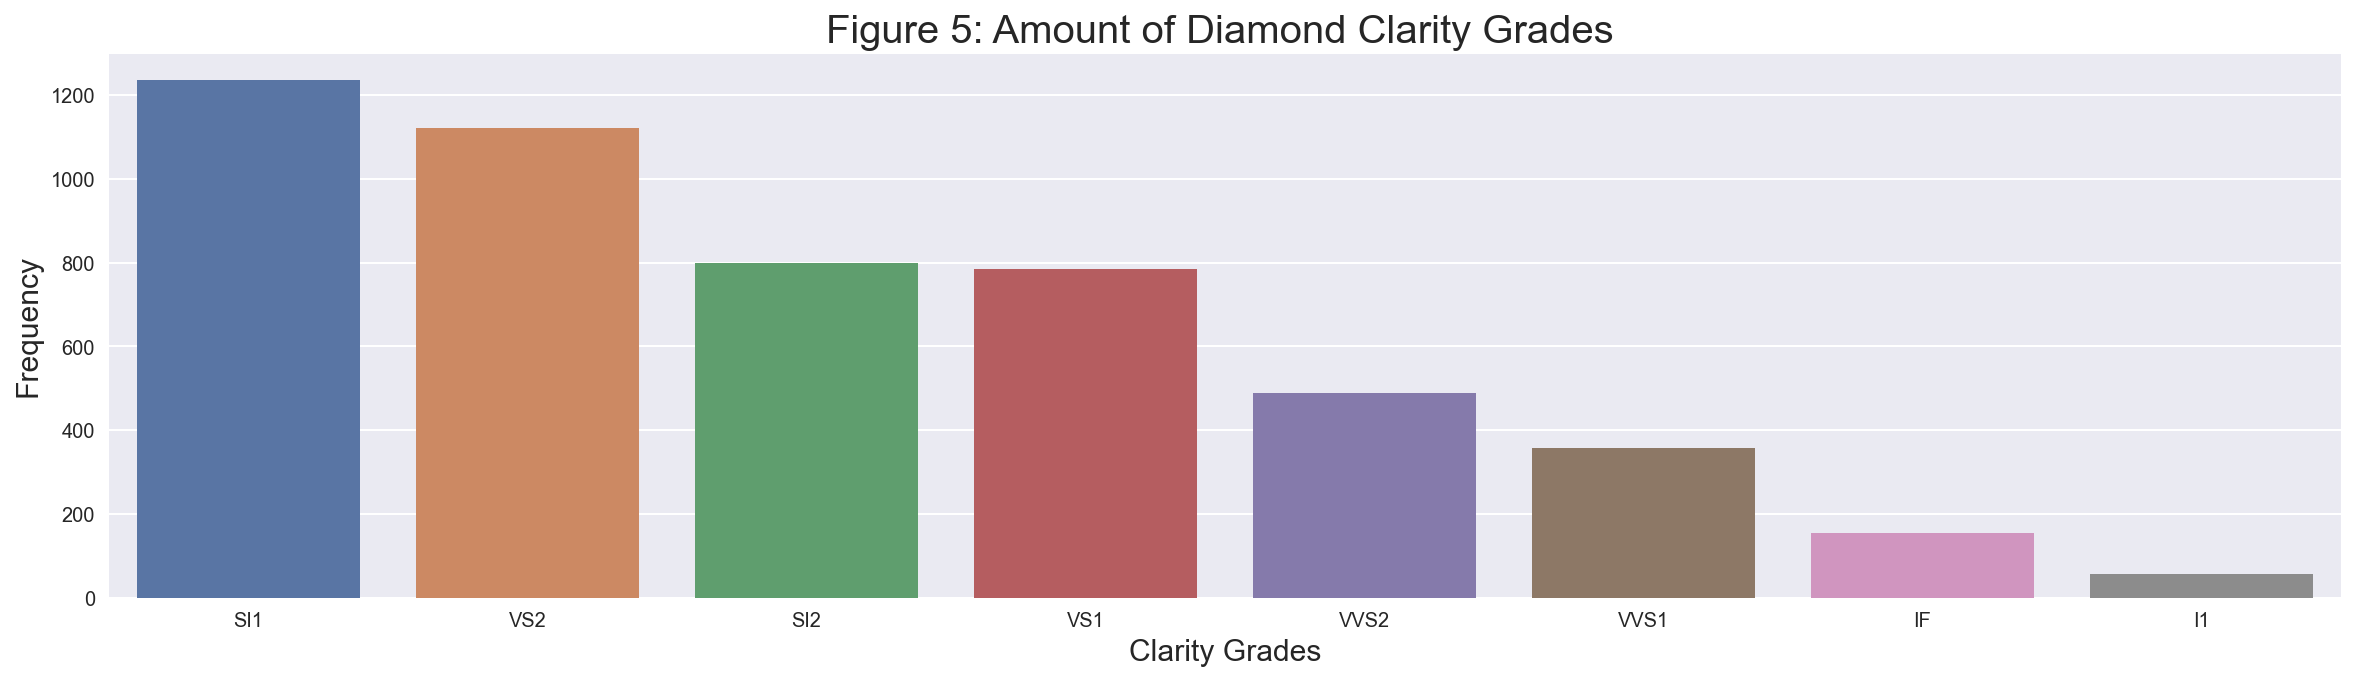

In [13]:
plt.figure(figsize = (20,5))
fig = sns.countplot(x = 'clarity', data = df, palette = 'deep', order = df['clarity'].value_counts().index)
fig = plt.title('Figure 5: Amount of Diamond Clarity Grades ', fontsize = 20)
plt.xlabel('Clarity Grades', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

The diamond clarity grade is as follows: 
- SI1 (Slightly Included) = Under a 10x magnification, inclusions can be seen, but they might not be very obvious to the unaided eye.
- VS2 (Very Slightly Included) = Under a 10x magnification, inclusions are challenging to see. Inclusions are typically invisible to the naked eye. VS1 has a few more inclusions.
- SI2 (Slightly Included) = Under a 10x magnification, inclusions can be seen, but they might not be very obvious to the unaided eye. SI1 has a few more inclusions.
- VS1 (Very Slightly Included) = Under a 10x magnification, inclusions are challenging to see. Inclusions are typically invisible to the naked eye.
- VVS2 (Very very Slightly Included) = Under a 10x magnification, inclusions are very difficult to see. Inclusions are typically invisible to the naked eye. VVS1 has a few more inclusions.
- VVS1 (Very very Slightly Included) = Under a 10x magnification, inclusions are very difficult to see. Inclusions are typically invisible to the naked eye. 
- IF (Internally Flawless) = No inclusions but may have blemishes on corners or outside.
- I1 (Included) =  Imperfections that can visibly be seen without magnification.

<h5>VIOLINPLOT OF CARAT FREQUENCY</h5>

Carat is also called a carat's weight because it refers to how much a diamond weighs rather than how big the diamond is. The violin plot below depicts the distribution of diamond carat weight ranges in this dataset. There are more light weighted diamonds than heavier weighted diamonds, as shown in the chart below.

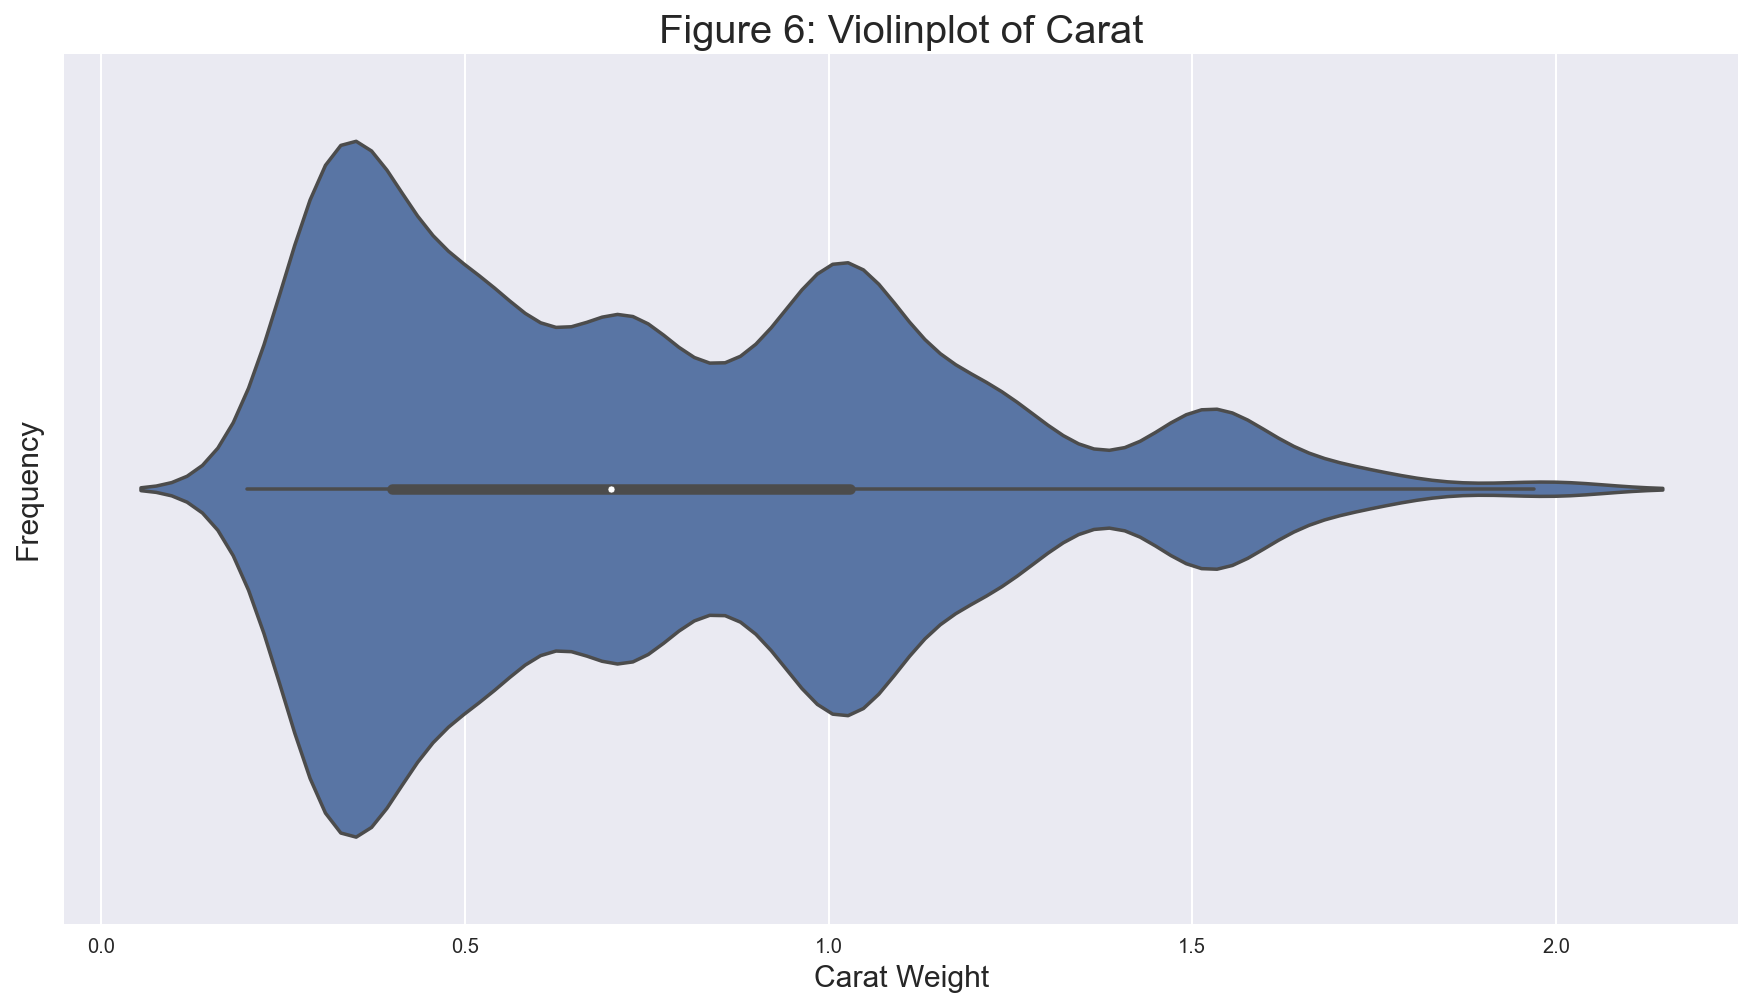

In [14]:
plt.figure(figsize = (15,8))
sns.violinplot(df['carat'], kde=False, bins=50).set_title('Figure 6: Violinplot of Carat', fontsize = 20)
plt.xlabel('Carat Weight', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

<h5>HISTOGRAM OF PRICE</h5>

The histogram below illustrates the distribution of the diamond's price range to determine the most typical price range for diamonds in this dataset. As seen in the chart beneath, the distribution is right-skewed (or positively skewed distribution), meaning that there are more diamond that falls into the lower price range than higher price range. In the lower price range, or more precisely below $2500 USD, the chart also features a single prominent peal (unimodal). In addition, the histogram indicates that the diamonds' mean price is higher than their median price.

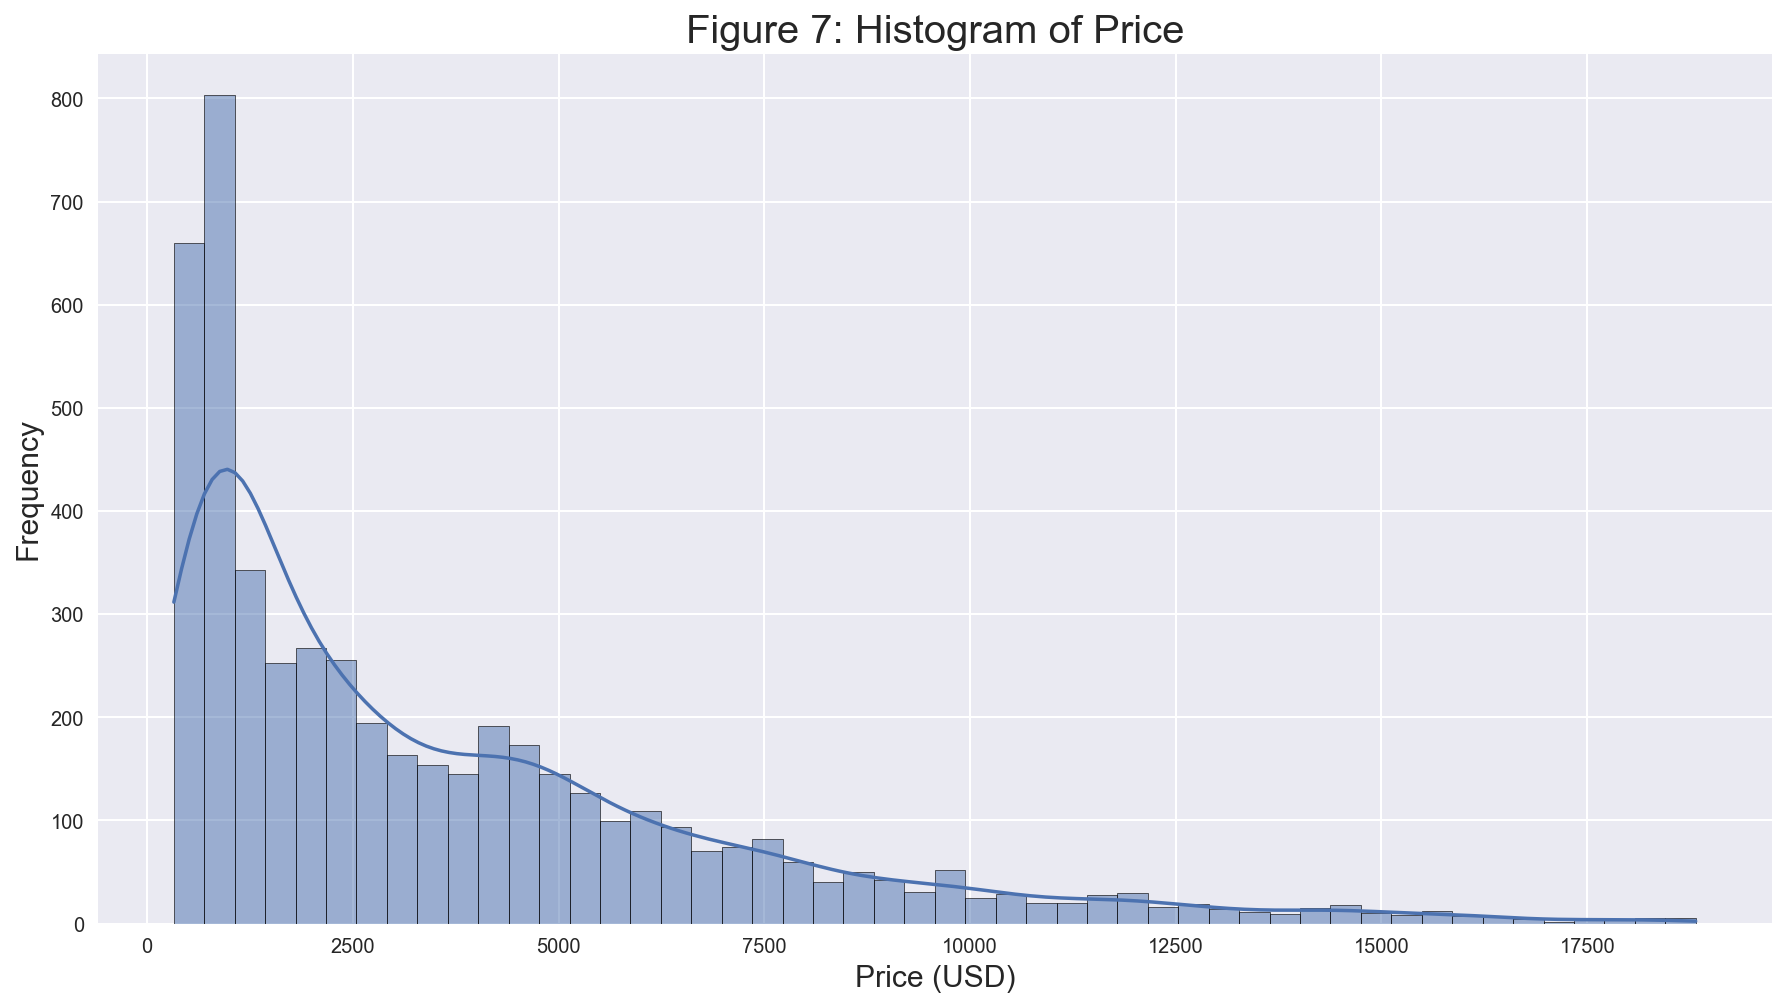

In [15]:
plt.figure(figsize = (15,8))
sns.histplot(df['price'], kde=True, bins=50).set_title('Figure 7: Histogram of Price', fontsize = 20)
plt.xlabel('Price (USD)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

<h4><b>Two-Variable Visualization</b></h4>


<h5>BOXPLOT OF PRICE BY CUT QUALITY</h5>

Figure 8 demonstrates how the diamond's cut might affect its price. We can see that "Premium" quality tends to be the most expensive from all the cuts. Followed by "Very Good", "Good", "Fair" and lastly "Ideal" looking at their lowest price range. 

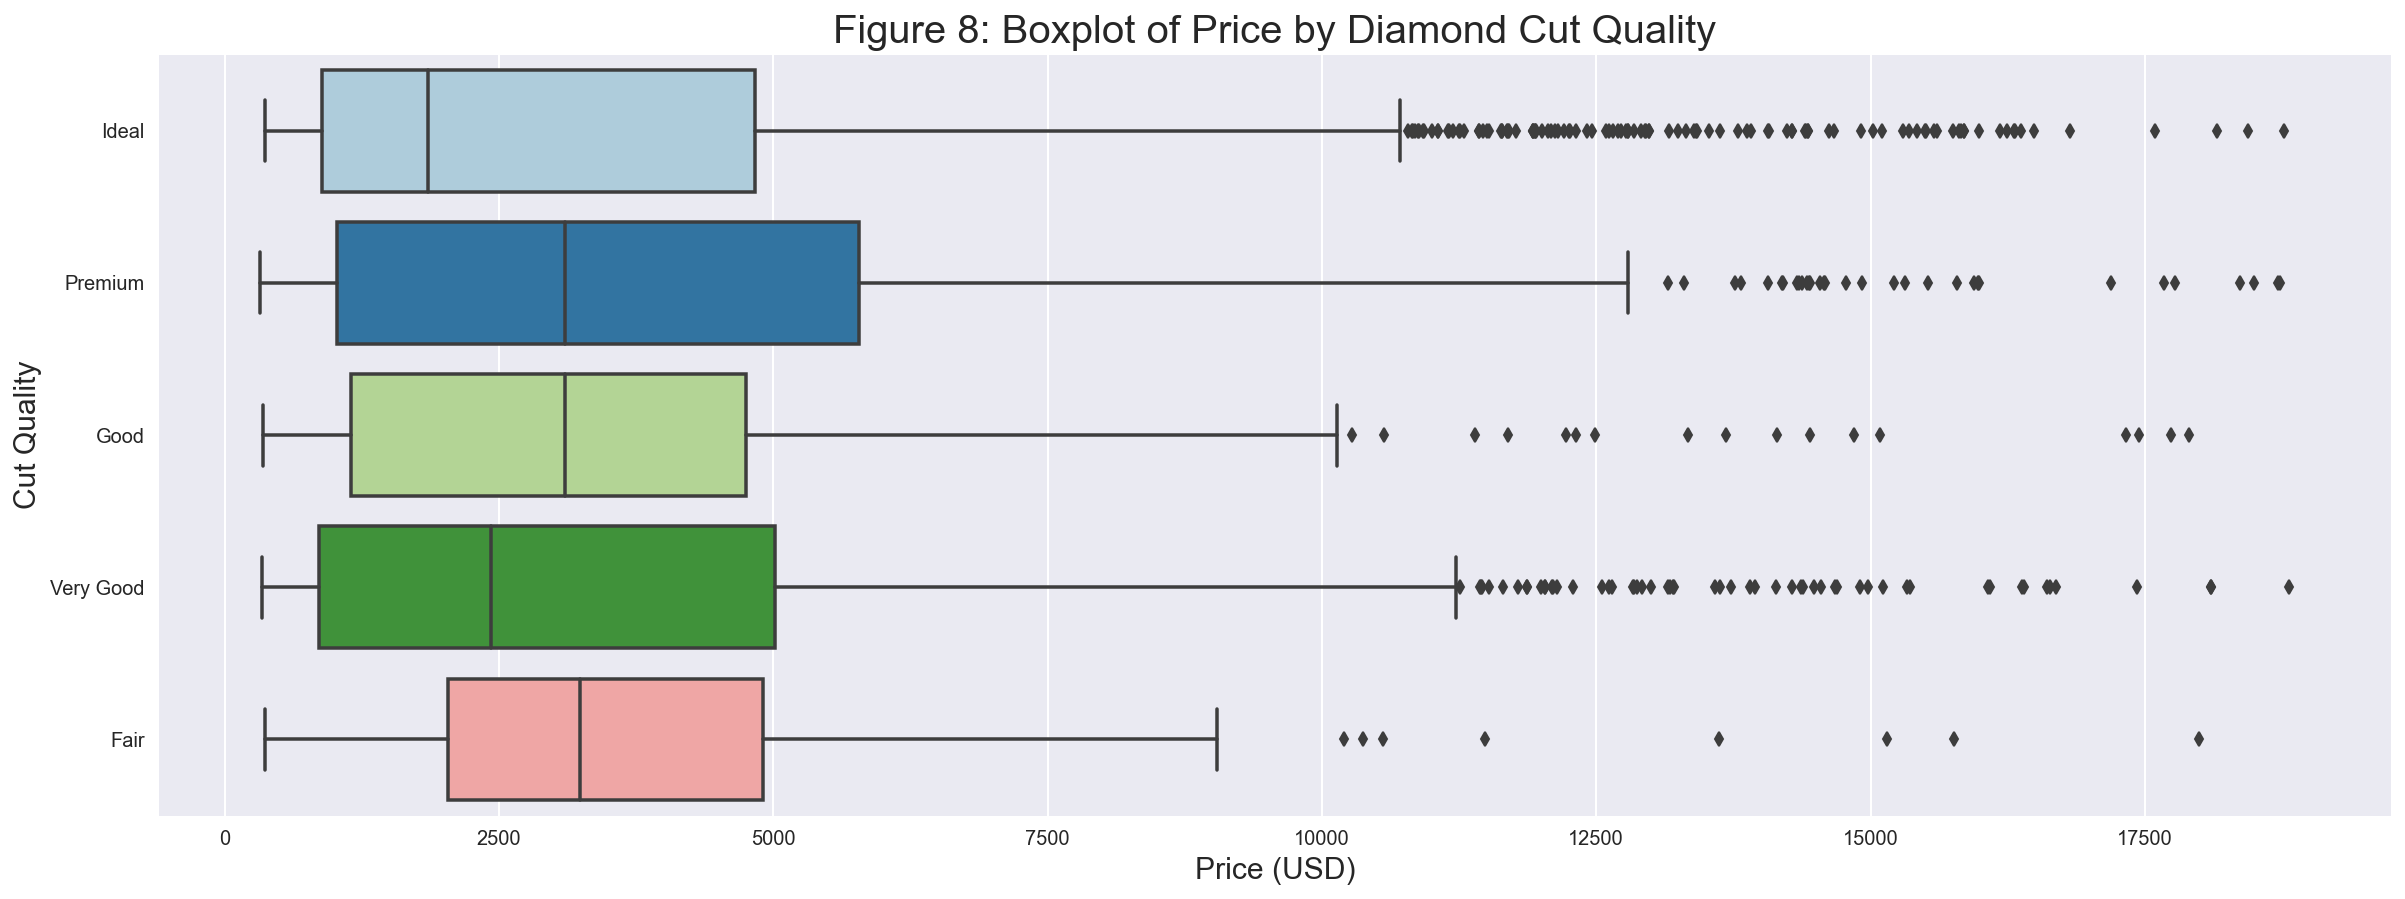

In [16]:
plt.figure(figsize = (20,7))
sns.boxplot(data = df, x="price", y="cut", palette='Paired')
plt.title('Figure 8: Boxplot of Price by Diamond Cut Quality', fontsize = 20)
plt.xlabel('Price (USD)', fontsize = 15)
plt.ylabel('Cut Quality', fontsize = 15)
plt.show()

<h5>BOXENPLOT OF PRICE BY COLOUR GRADE</h5>

Figure 9 below demonstrates how the diamond's color might affect its price and reveals that the colour grade "J" generally has a higher price than the other varieties, while the colour grade "E" has the lowest. Additionally, the chart reveals that the median price for both "F" and "G" colour grade are almost the same, which is $2500 USD, but the highest median price is the "J" colour grade, with "E" having the lowest median price.

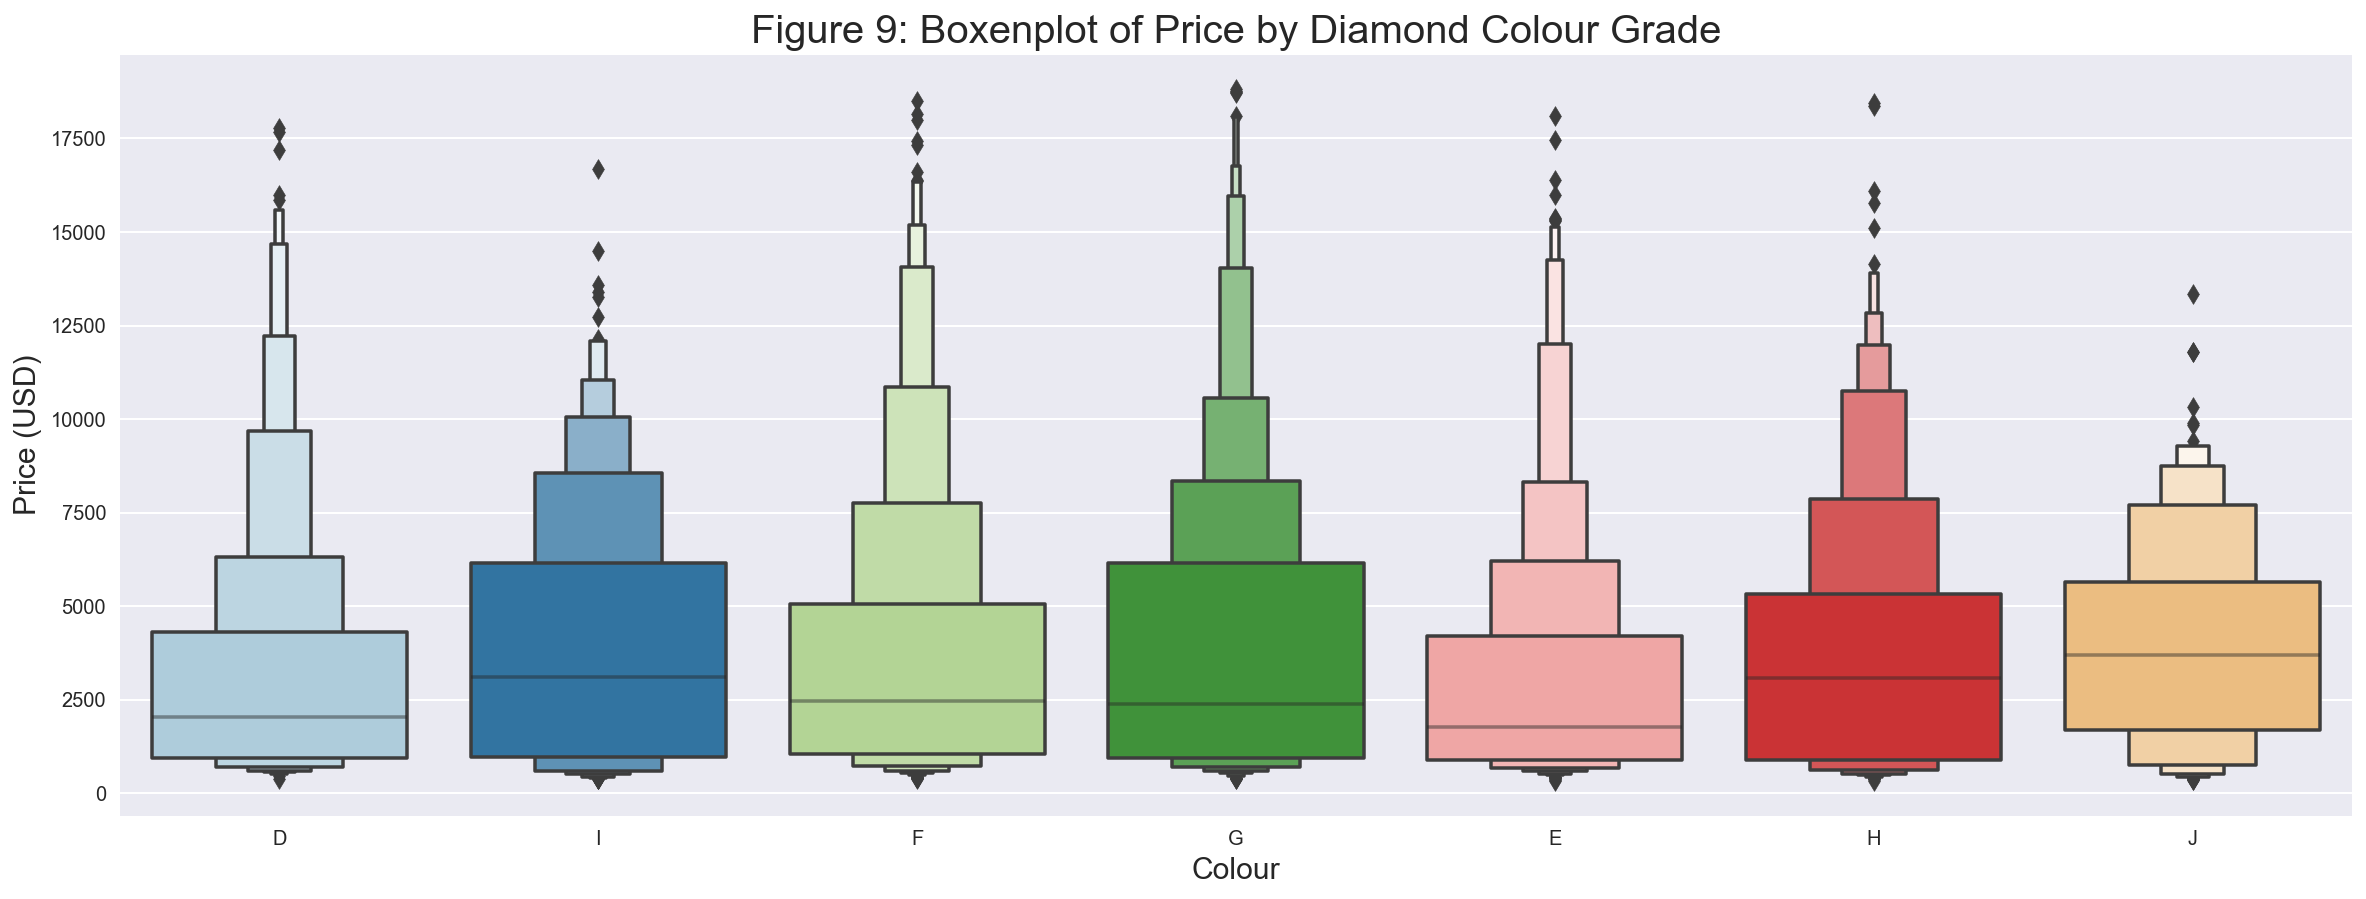

In [17]:
plt.figure(figsize = (20,7))
sns.boxenplot(data = df, x="color", y="price", palette='Paired')
plt.title('Figure 9: Boxenplot of Price by Diamond Colour Grade', fontsize = 20)
plt.xlabel('Colour', fontsize = 15)
plt.ylabel('Price (USD)', fontsize = 15)
plt.show()

<h5>SCATTERPLOT OF PRICE BY CARAT</h5>

Figure 10 observes the relationship between the diamonds' price and its carat and shows a strong positive correlation (0.9) between the two variables, price and carat, meaning that both the carat and price increase and decrease together in a similar fashion. To validate that figure 8 shows a strong positive correlation, we have calculated it using the Pearson Correlation Coefficient formula and display its result down below.

Pearson Correlation Coefficient:

In [18]:
from scipy.stats import pearsonr

corr, _= pearsonr(df['carat'], df['price'])
print('Pearson Correlation Coefficient: ', corr)

Pearson Correlation Coefficient:  0.903461781960776


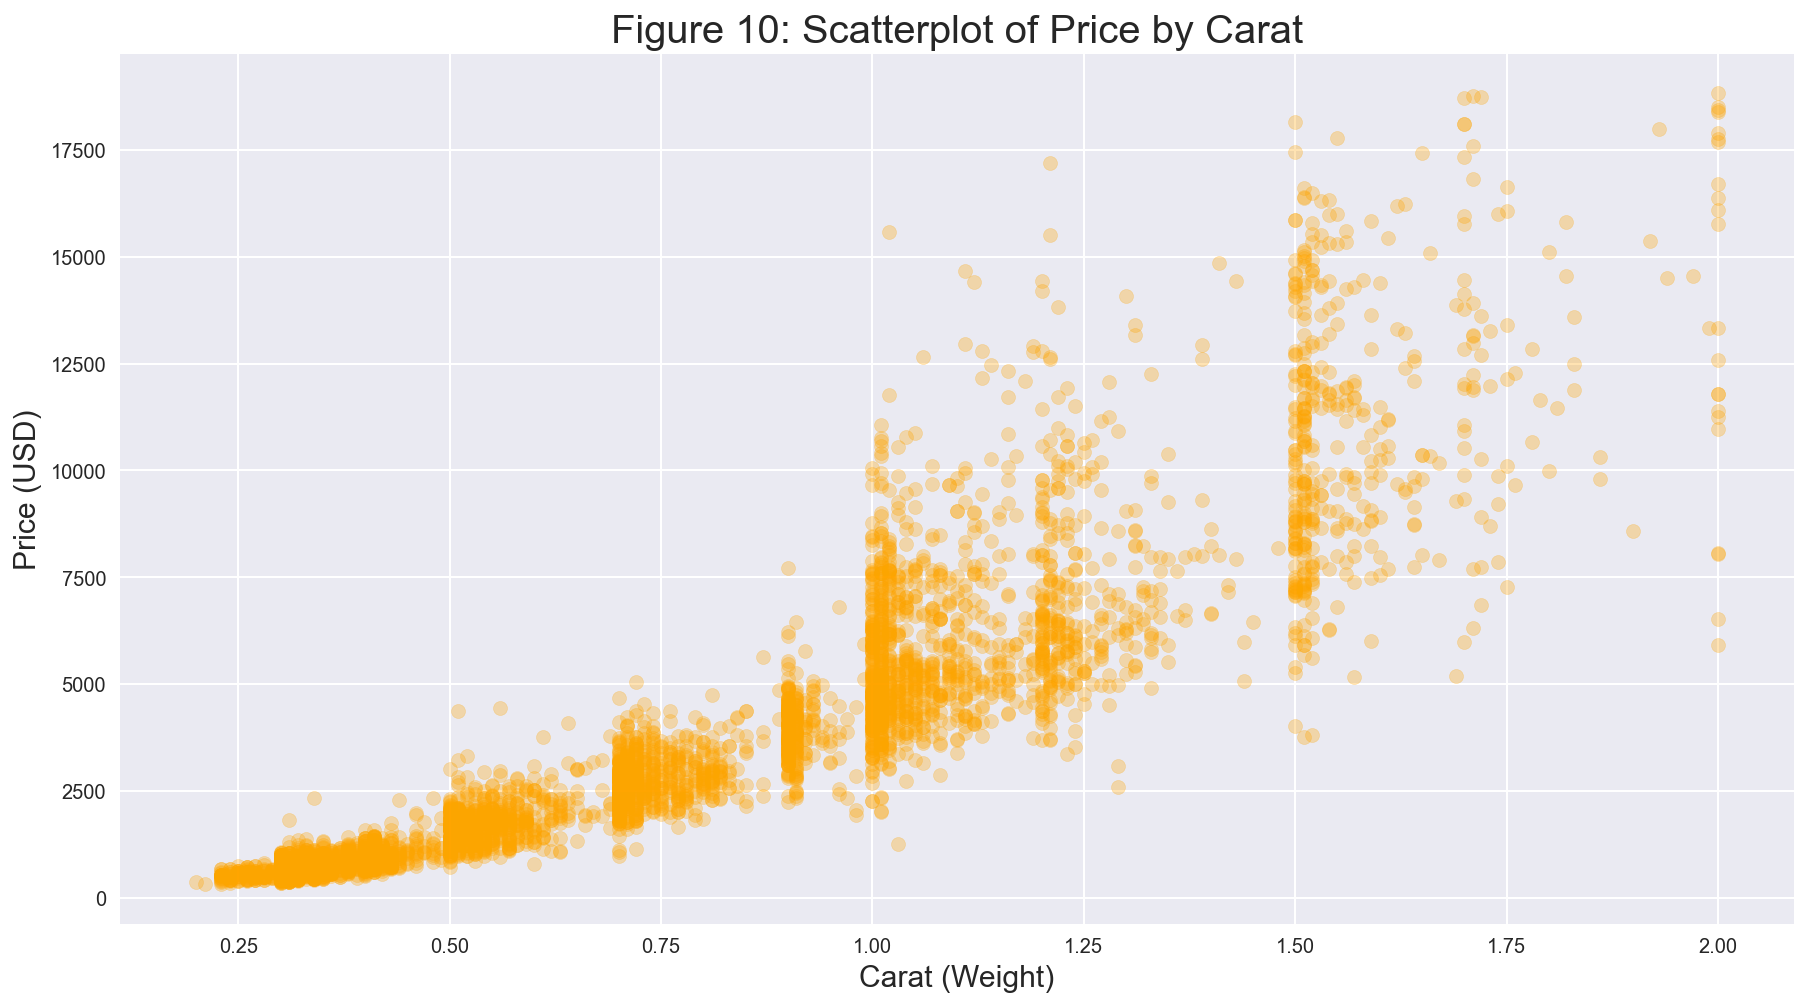

In [19]:
from turtle import color

plt.figure(figsize = (15,8))
plt.scatter(df['carat'], df['price'], alpha = 0.3, color="orange")
plt.title('Figure 10: Scatterplot of Price by Carat', fontsize = 20)
plt.xlabel('Carat (Weight)', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
plt.show()

<h5>SCATTERPLOT OF PRICE BY LENGTH</h5>

Figure 11 examines the relationship between the price of diamonds and their length, revealing a strong positive correlation (0.86) between the two variables, price and length, implying that both the length and price increase and decrease in tandem. We calculated the Pearson Correlation Coefficient formula and displayed the result below to validate that figure 11 shows a strong positive correlation.

Pearson Correlation Coefficient:

In [20]:
from scipy.stats import pearsonr

corr, _= pearsonr(df['carat'], df['price'])
print('Pearson Correlation Coefficient: ', corr)

Pearson Correlation Coefficient:  0.903461781960776


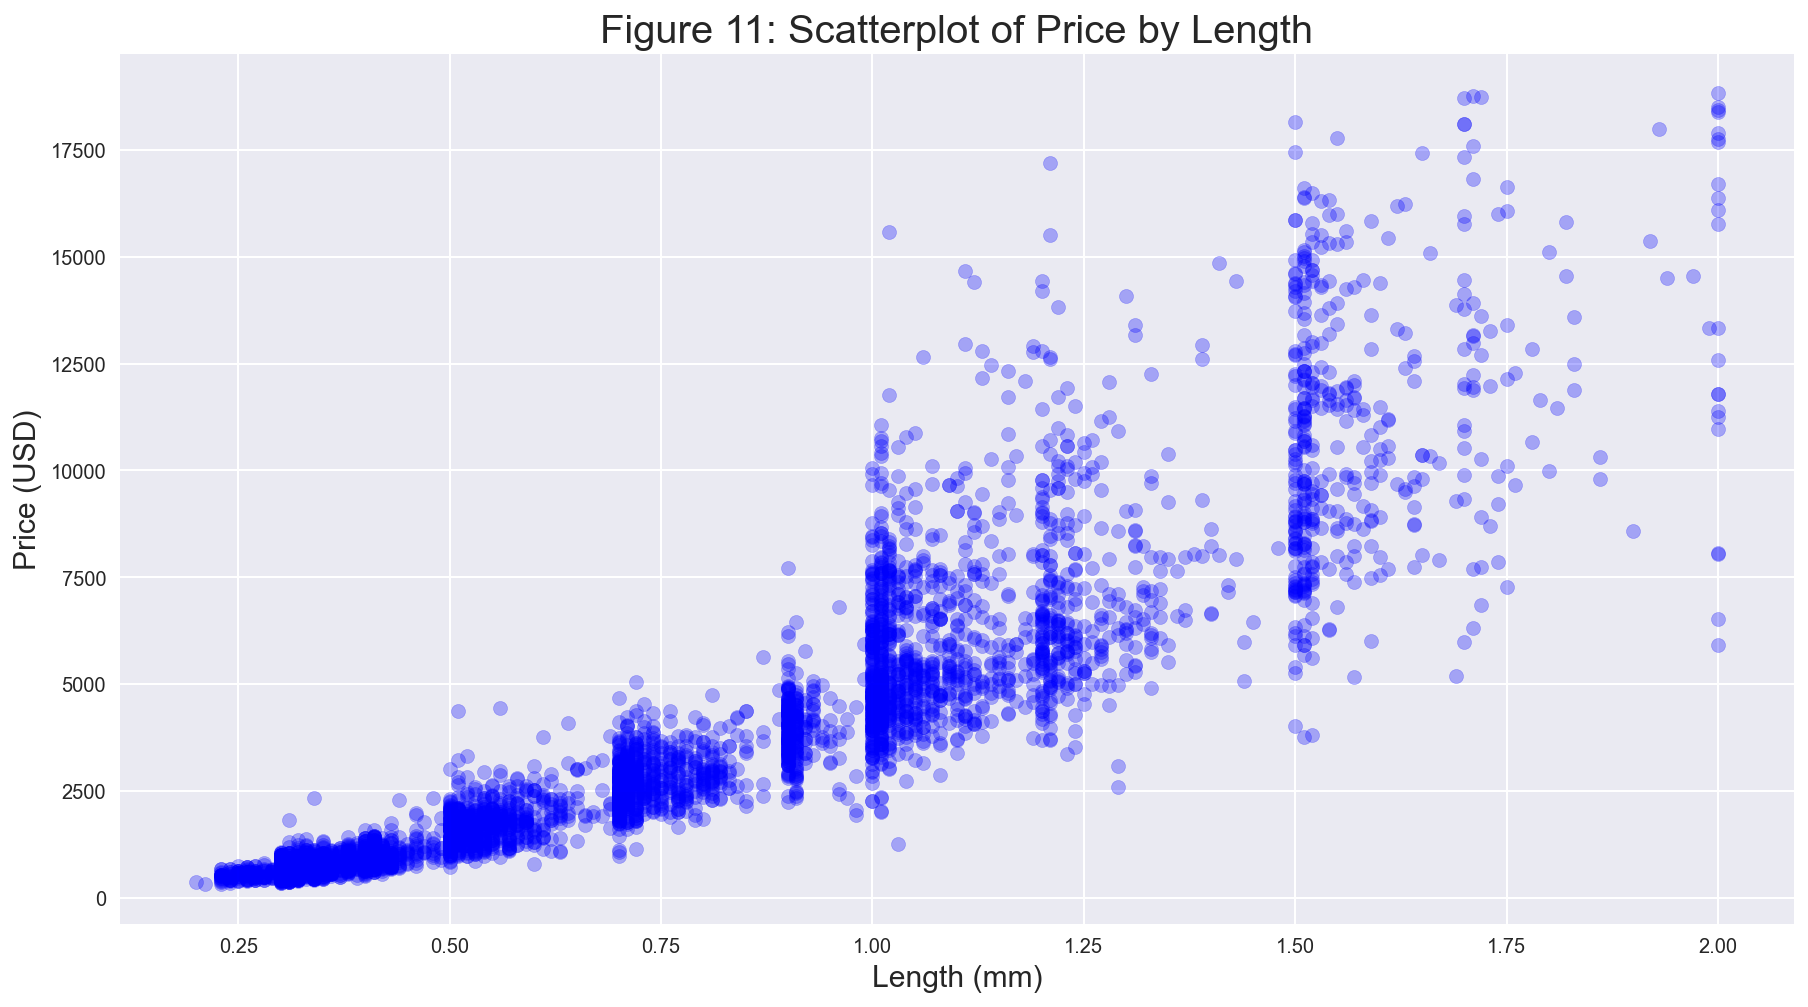

In [21]:
from turtle import color

plt.figure(figsize = (15,8))
plt.scatter(df['carat'], df['price'], alpha = 0.3, color="blue")
plt.title('Figure 11: Scatterplot of Price by Length', fontsize = 20)
plt.xlabel('Length (mm)', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)
plt.show()

<h5>BOXPLOT OF PRICE BY DIAMOND CLARITY</h5>

Information on diamond prices according on clarity is shown in Figure 12. The SI2 clarity of a diamond has the greatest median price, while the IF clarity has the lowest median price. For the sake of clarity, the VS2, VS1, SI1, and SI2 have the highest upper quartile prices. On the other side, I1, VVS2, VVS1, and IF have the lowest upper quartile price based on clarity.

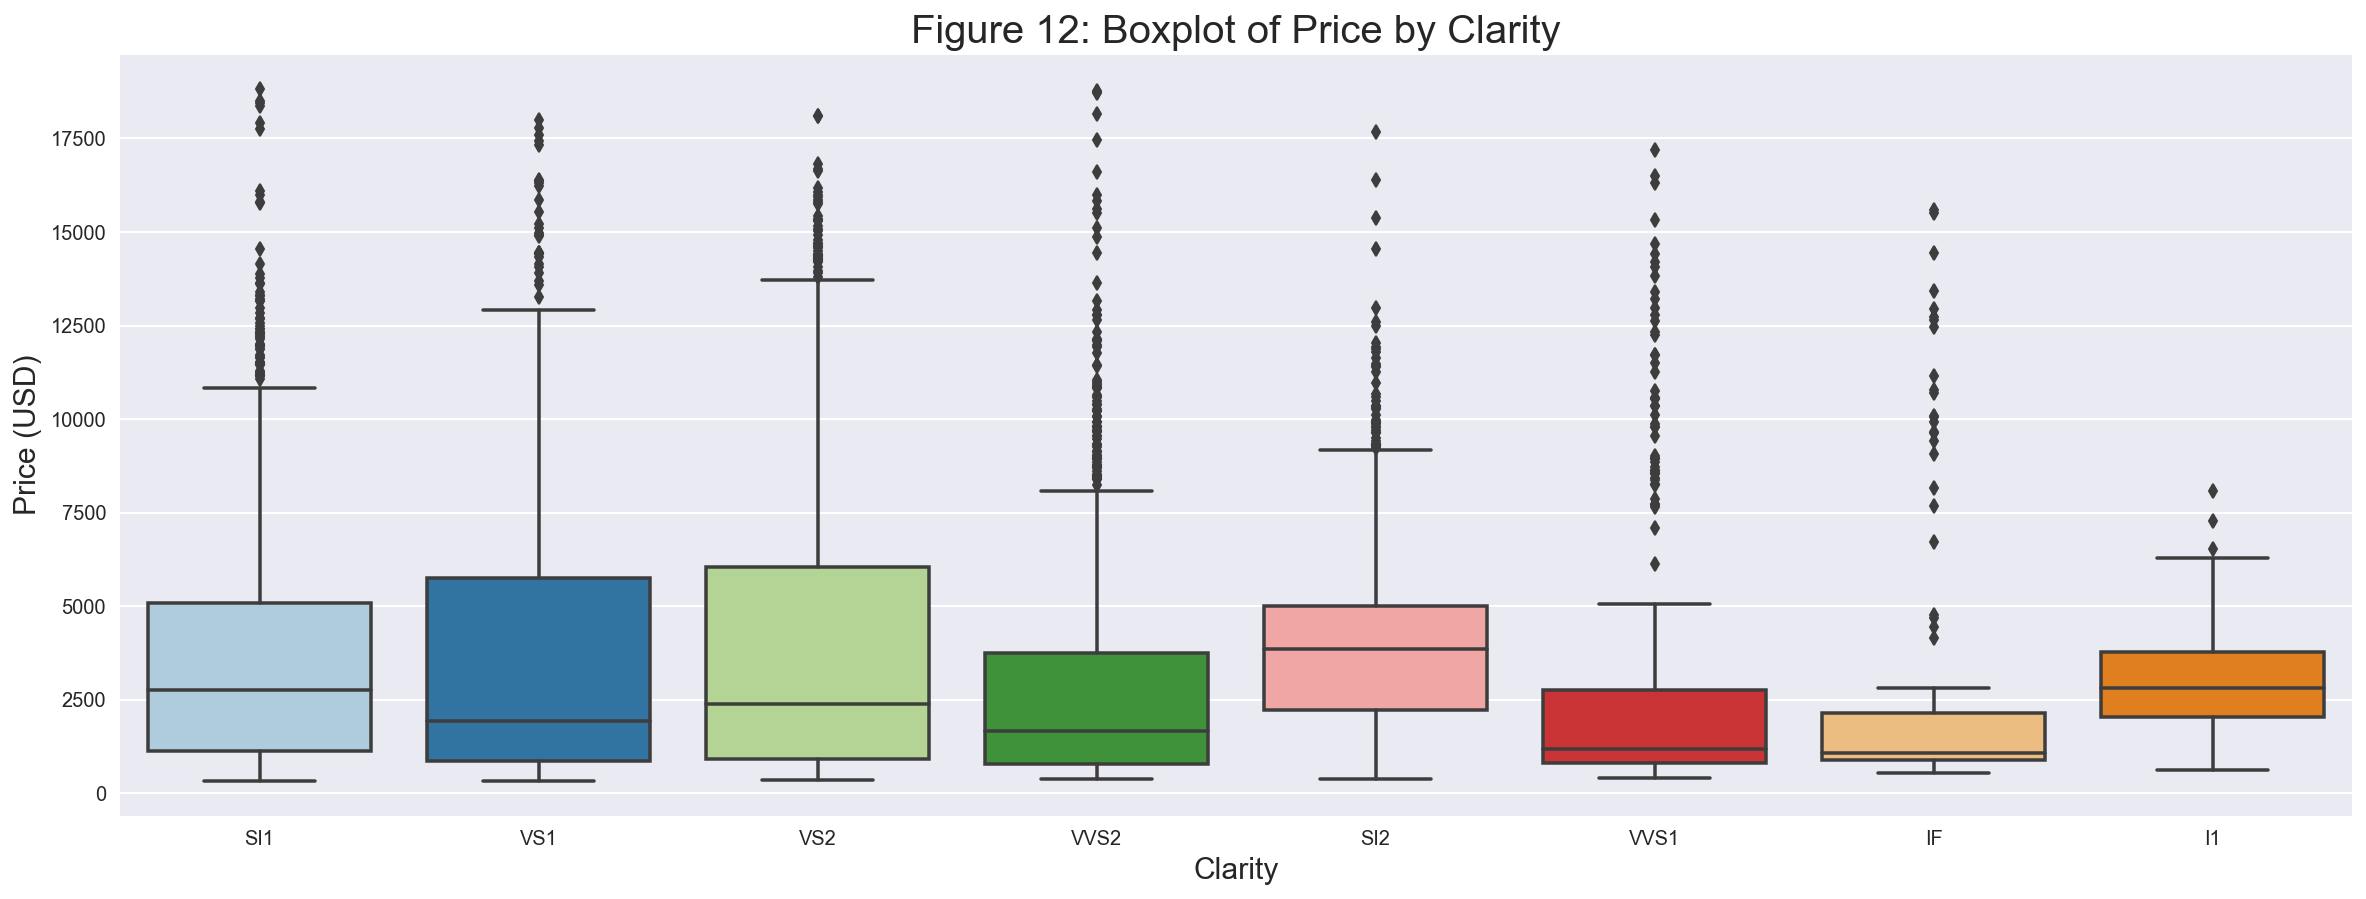

In [22]:
plt.figure(figsize = (20,7))
sns.boxplot(data = df, x="clarity", y="price", palette='Paired')
plt.title('Figure 12: Boxplot of Price by Clarity', fontsize = 20)
plt.xlabel('Clarity', fontsize = 15)
plt.ylabel('Price (USD)', fontsize = 15)
plt.show()

<h4><b>Three-Variable Visualization</b></h4>
<h5>BARPLOT OF PRICE BY COLOUR AND CUT</h5>
Overall, we can see that the dataset has a large number of cut diamonds of "Premium" quality, with the "J" colour grade diamond being the most expensive. On the other hand, the dataset only has a small number of "Ideal" quality cut diamonds, with "E" is the diamond with the lowest price according to its colour grade.

Text(0, 0.5, 'Diamond Price')

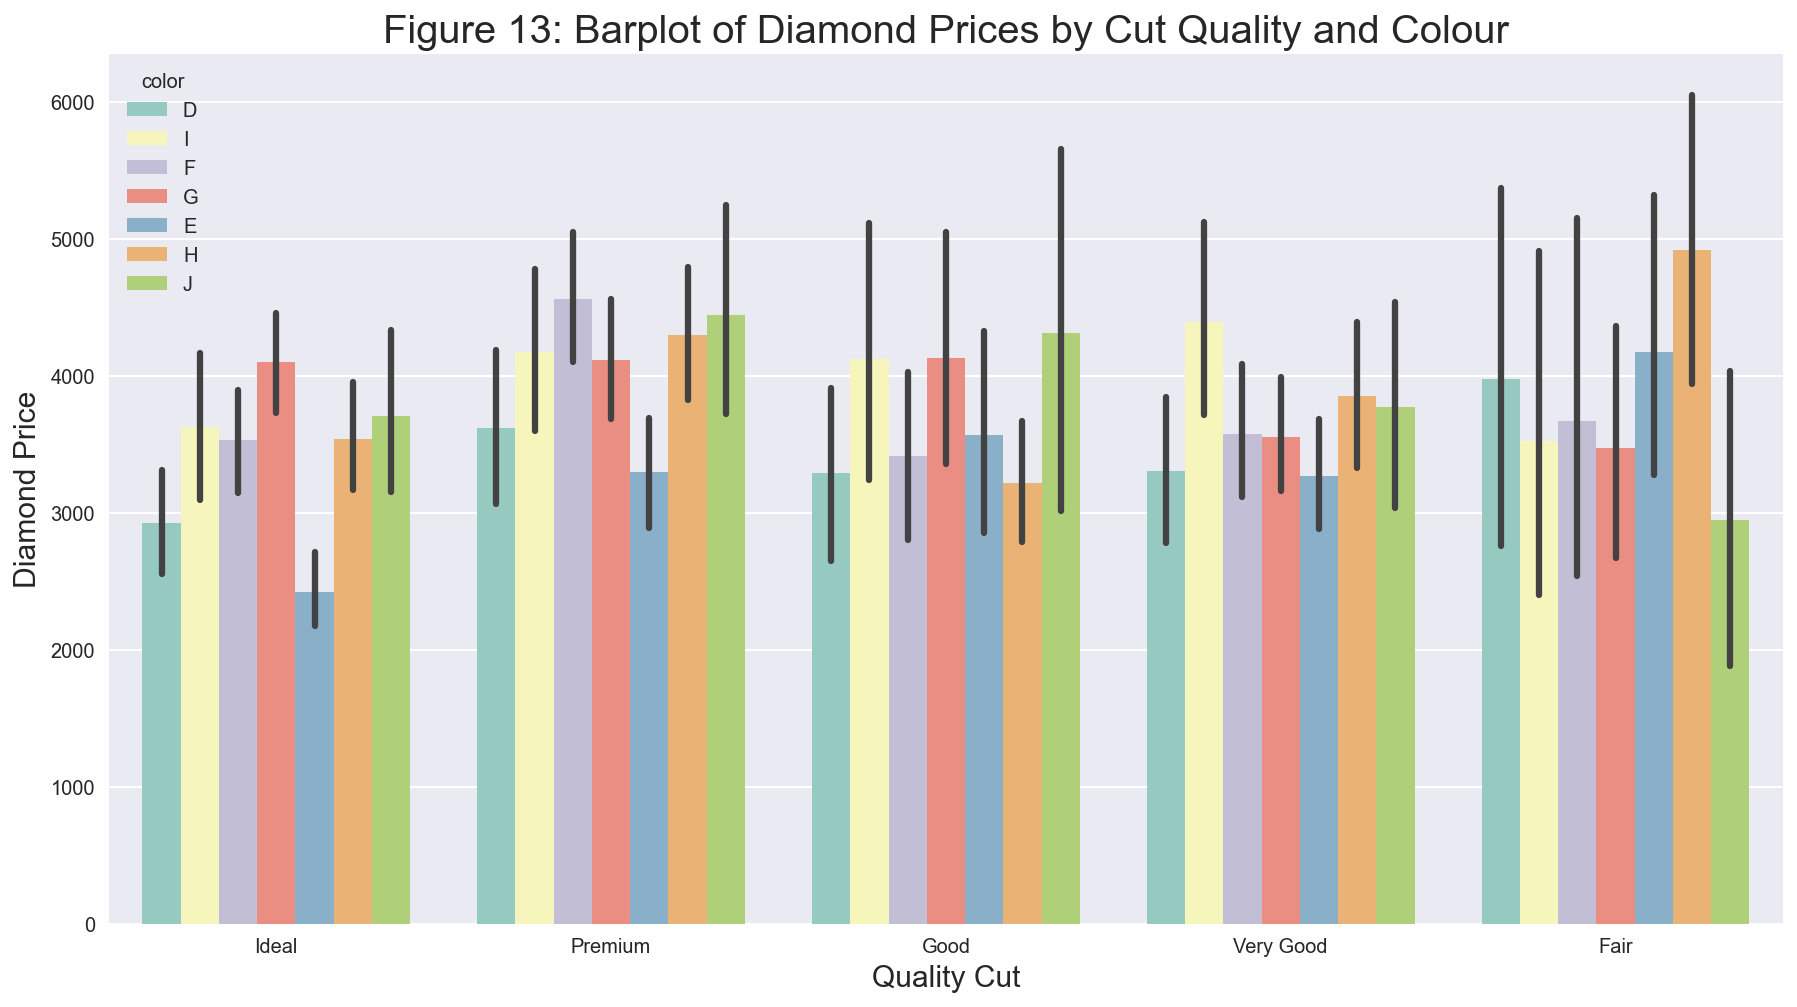

In [23]:
plt.figure(figsize = (15,8))
fig_4 = sns.barplot(x ='cut', y ='price', hue = 'color', data = df, palette='Set3')
plt.title('Figure 13: Barplot of Diamond Prices by Cut Quality and Colour', fontsize = 20)
plt.xlabel('Quality Cut', fontsize = 15)
plt.ylabel('Diamond Price', fontsize = 15) 

<h5>SCATTERPLOT OF PRICE BY CARAT AND CLARITY</h5>
According to Figure 14, the majority of the diamonds in the dataset that have a carat of I1, SI2 and SI1 are less expensive because of their clarity. On the other hand, diamonds with a carat of IF, VS2 and VS1 has a higher price. However, despite the fact that most diamonds with a SI1 clarity are the least expensive in the dataset, there is one particular 2 carat SI1 diamond whose price is more than $17500 USD and is the most expensive diamond overall.

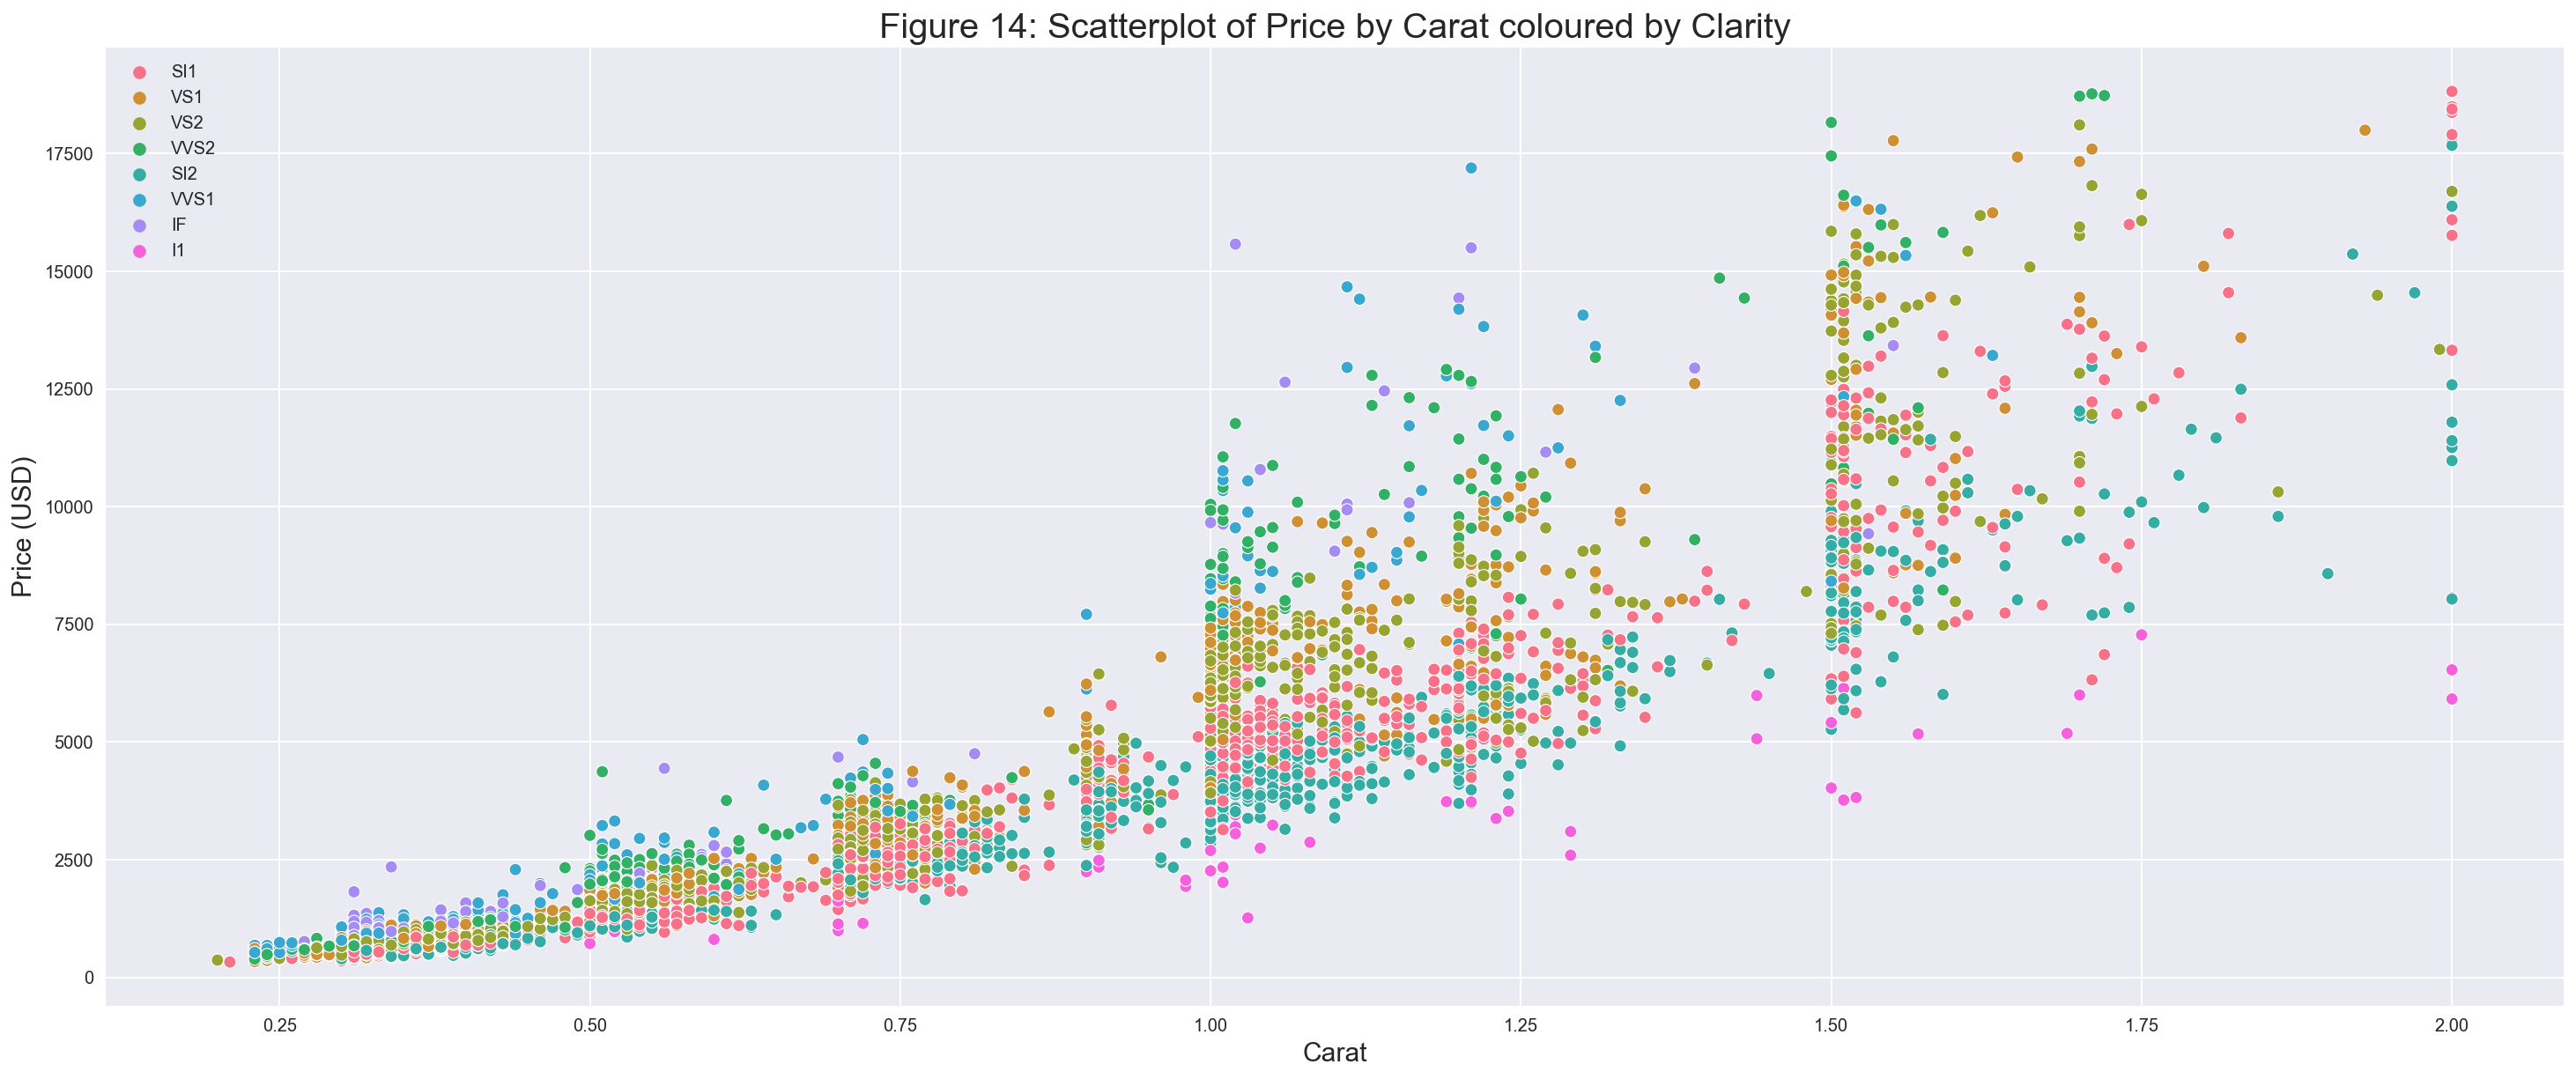

In [24]:
plt.figure(figsize = (25, 10))
sns.scatterplot(df['carat'], df['price'], hue = df['clarity'])
plt.title('Figure 14: Scatterplot of Price by Carat coloured by Clarity', fontsize = 20)
plt.xlabel('Carat', fontsize = 15)
plt.ylabel('Price (USD)', fontsize = 15)
plt.legend(loc = 'upper left')
plt.show()

<h5>BARPLOT OF COLOUR BY PRICE BASED ON CLARITY</h5>
Using a barplot for Figure 15 allows for easy visualisation of data, in this case a diamonds Colour and Clarity and how it effects its overall price. According to Figure 16, we can tell that colour E is overall the cheapest across all clarity types, while on the overhand colours F and G are the most consistant in terms of Clarity and Price. Also Figure 15 shows a large spike in diamonds of the Colour Grade D with a clarity of IF having a the highest observation and price range. 

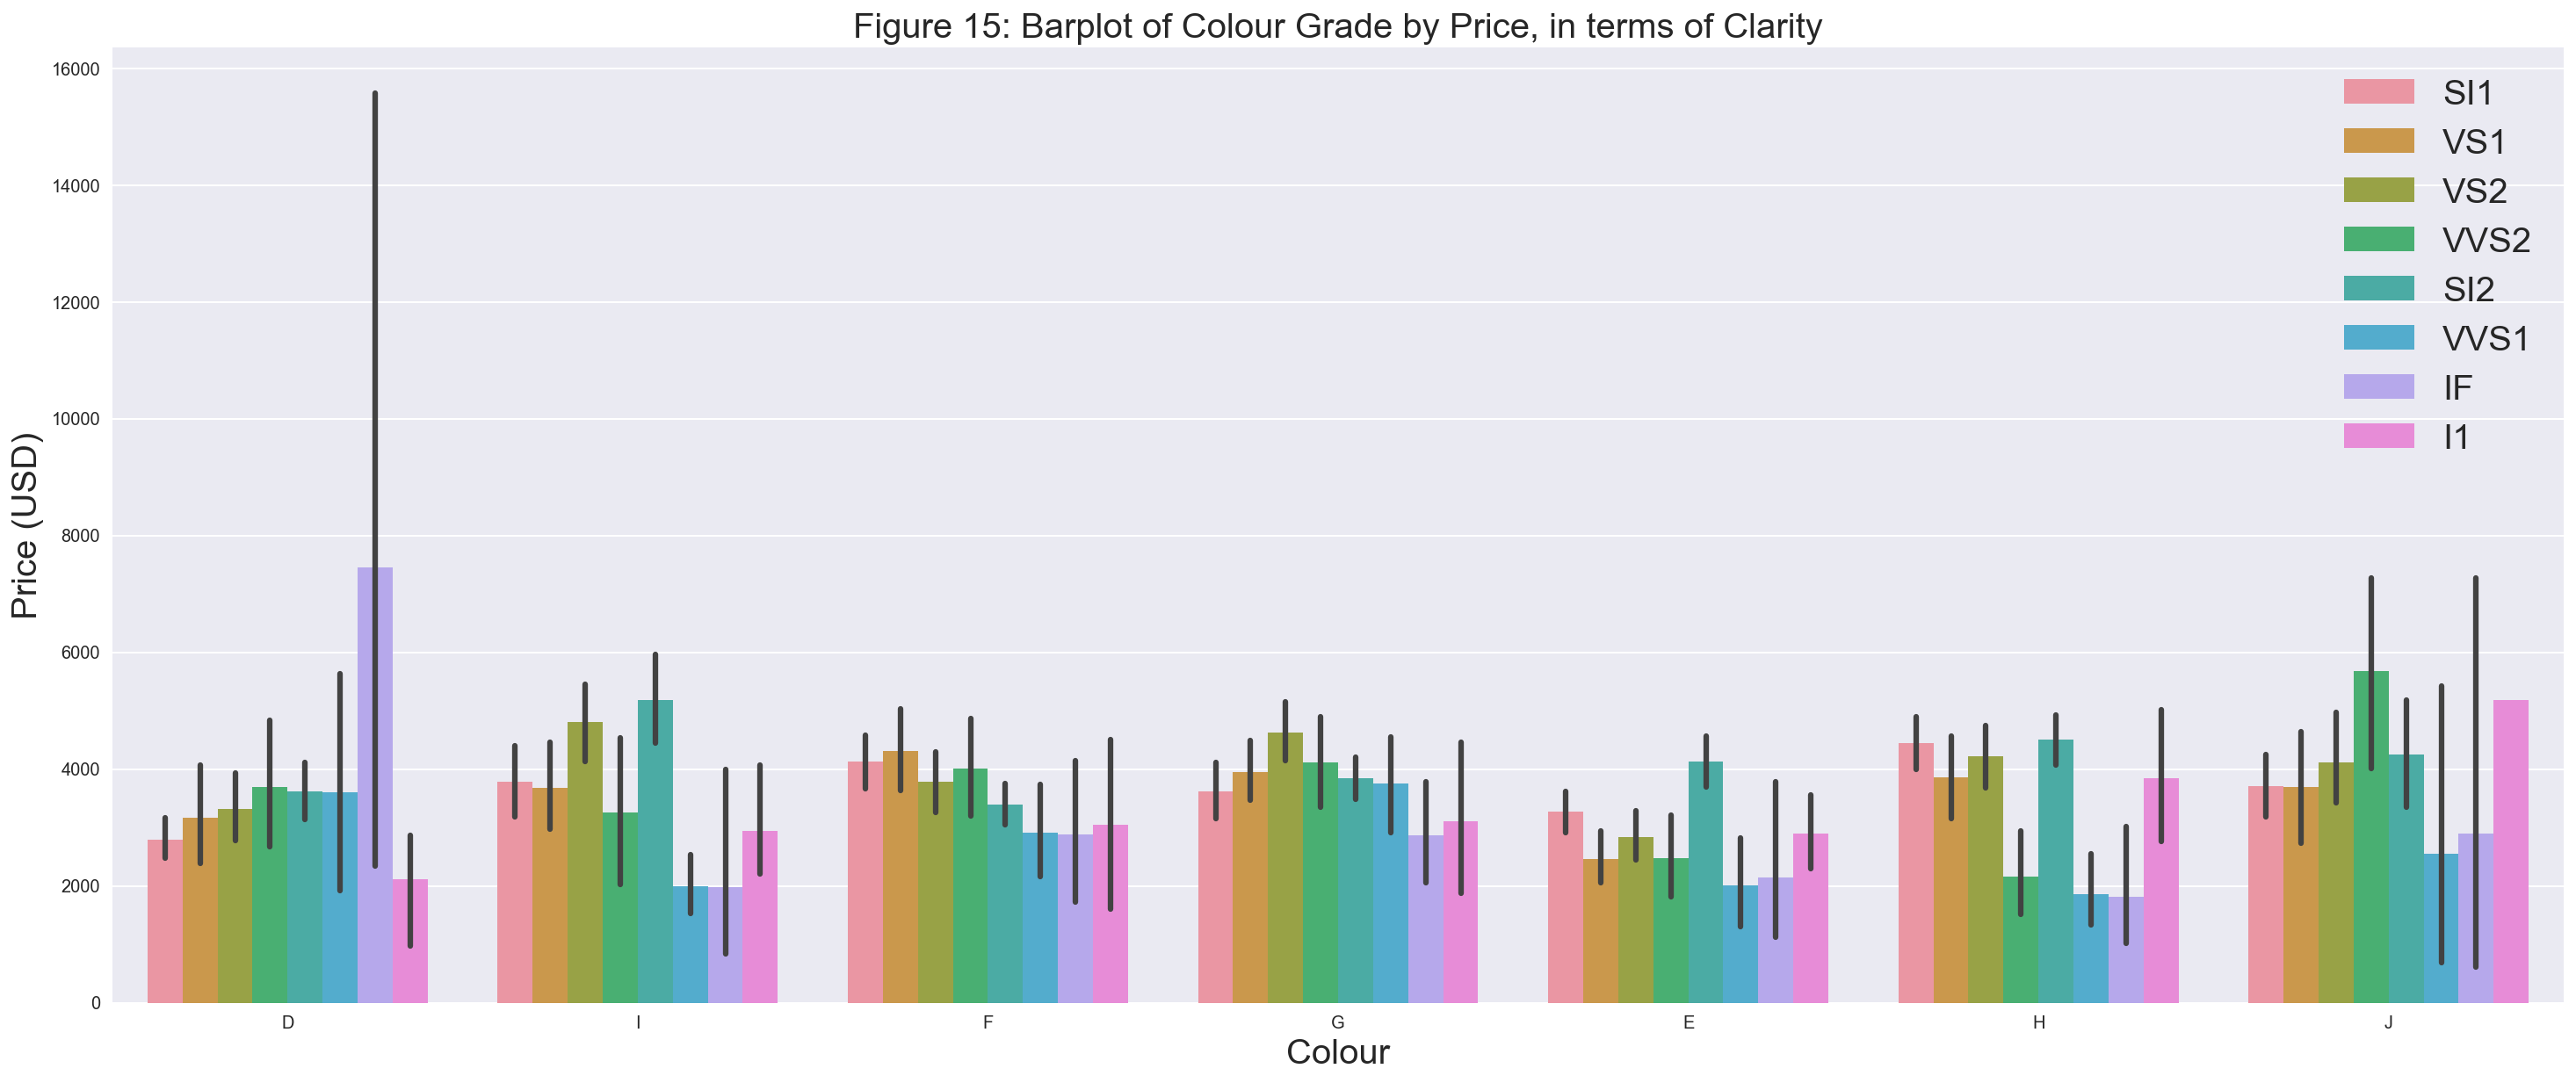

In [25]:
plt.figure(figsize = (25,10))

sns.barplot(df['color'], df['price'], hue = df['clarity'])
plt.title('Figure 15: Barplot of Colour Grade by Price, in terms of Clarity', fontsize = 20)
plt.xlabel('Colour', fontsize = 20)
plt.ylabel('Price (USD)', fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

<h5>STRIPPLOT OF CUT BY PRICE BASED ON DIFFERENT VARIABLES</h5>
Using a Strip plot for figure 16 allows us to visualise the density of all diamonds in each cut category in terms of the parameter of colour. In the case of Figure 16 we can determine that the categories of Ideal, Premium and Very Good are the most densly populated within this dataset in the price range of $5,000 and below. While all Cut categories show differnet densities it is still noted that within these different categories they all have observed diamonds that are in the highest price ranges from 15,000 and above.  

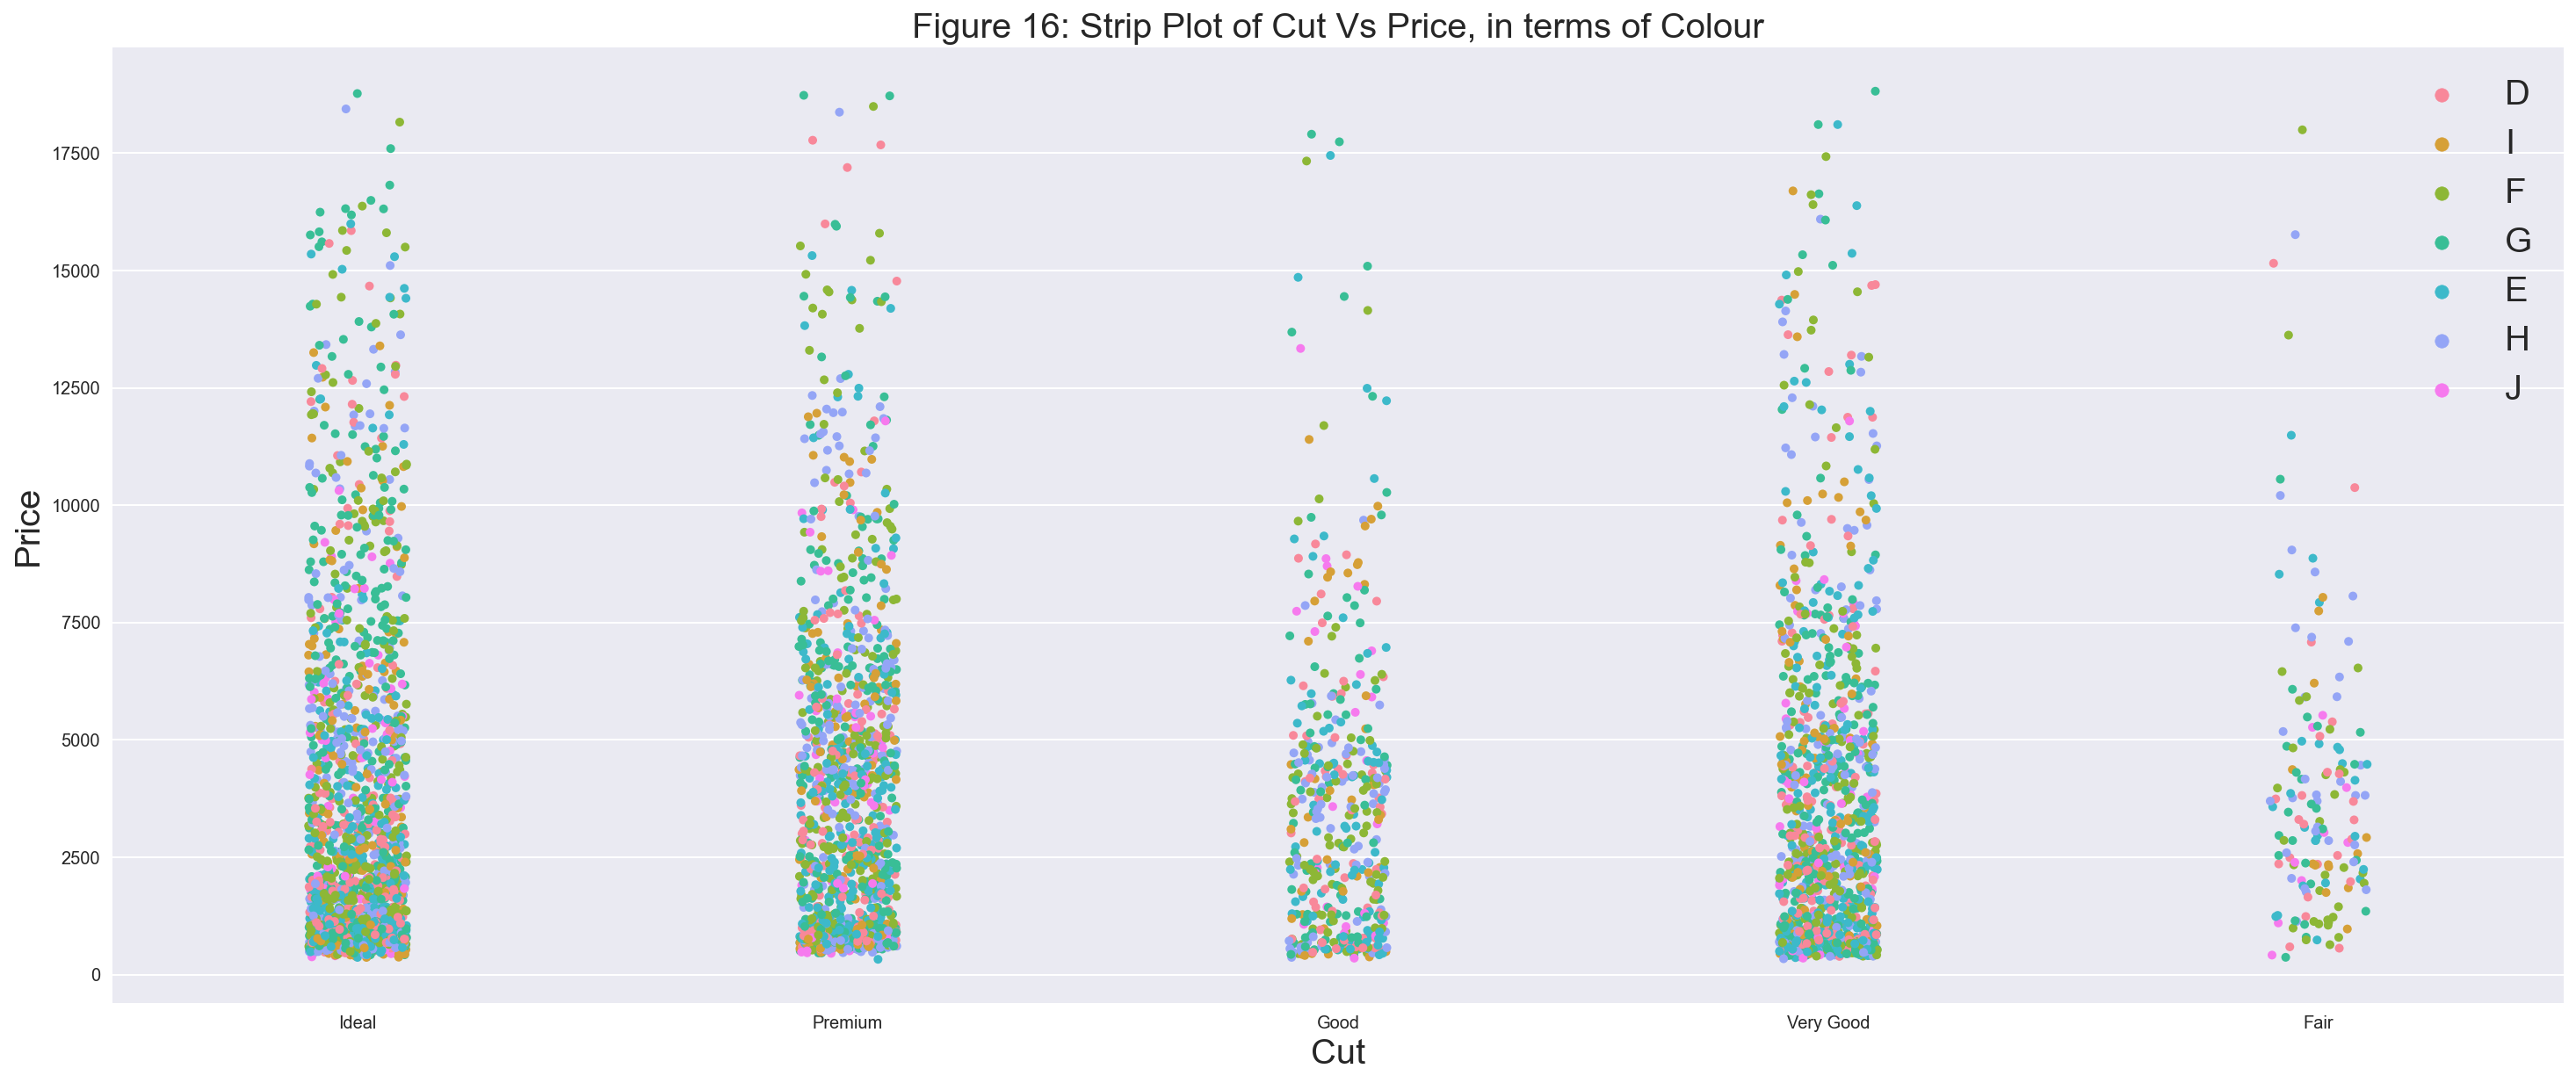

In [26]:
plt.figure(figsize = (25, 10))

sns.stripplot(df['cut'], df['price'], hue = df['color'])

plt.title('Figure 16: Strip Plot of Cut Vs Price, in terms of Colour', fontsize = 20)
plt.xlabel('Cut', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

<h5>SCATTERPLOT OF CARAT BY PRICE BASED ON CUT</h5>
According to their weight and price, the majority of diamonds in the dataset have an ideal cut, as illustrated in Figure 16. Additionally, the ideal cut has a direct correlation to price because it is dispersed across all ranges of diamond carats (weight). This means that the ideal cut and the carat will raise the diamond's price on the whole.

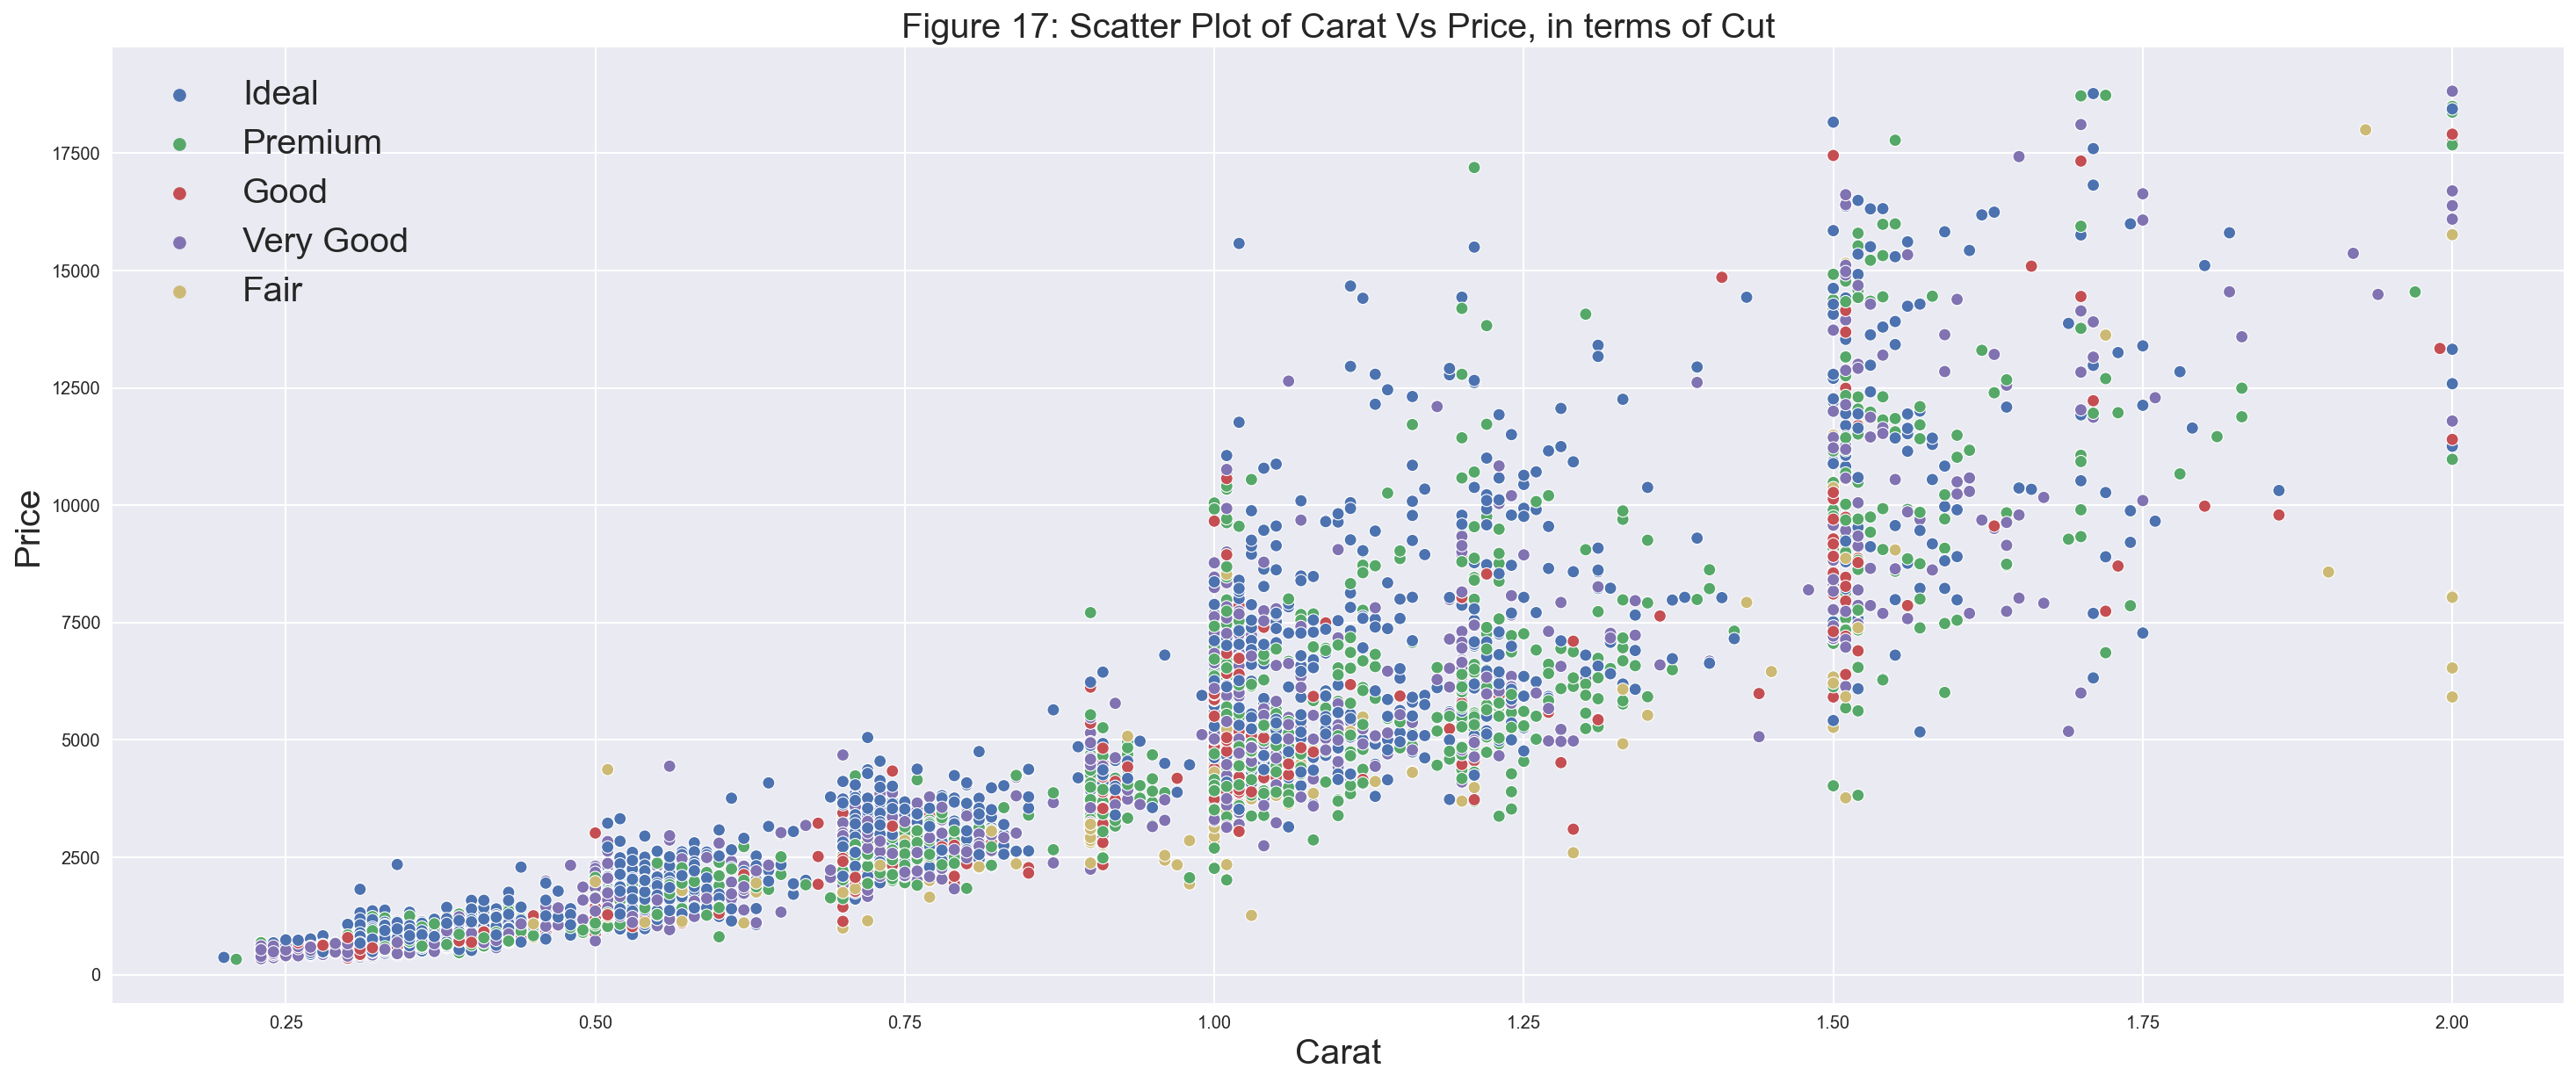

In [27]:
plt.figure(figsize = (25, 10))

sns.scatterplot(df['carat'], df['price'], hue = df['cut'])
plt.title('Figure 17: Scatter Plot of Carat Vs Price, in terms of Cut', fontsize = 20)
plt.xlabel('Carat', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend(loc = 'upper left', fontsize = 20)
plt.show()

<a id="summary-and-conclusion"></a><h3><b>Summary and Conclusion</b></h3>

The history of mankind's obsession with the diamonds is well-documented, and it still captivates people today. Diamonds are the  only precious stone made entirely of pure carbon, a diamond is transparent and colourless. Since they are the toughest gemstones known to man, only other diamonds can scratch them. About 100 miles below the surface of the Earth, in the upper mantle, diamonds are created. The combination of high temperature and high pressure is what is required for the growth of diamond crystals in the Earth. There is also a lot of pressure due to the weight of the underlying rock pressing down. 

Diamonds are very scarce since they required incredibly strong forces to generate them. Diamonds are therefore considered to be Very Expensive. Pricing for diamonds comprises a complicated procedure that is influenced by a number of variables, including carat, cut, colour, and price. This report examines the relationship between these variables and visualises it.

About 50K observations are included in the diamond.csv dataset file, which also includes 10 variables like as carat, cut, colour, clarity, depth, table, price, and x (length in mm), y (width in mm), and z. (depth in mm). Overall, a tidy dataset without any errors or missing values.

Summary of Data Description
<ul>
    <li>This dataset has colour, cut, and clarity as its ordinal/categorical attributes and Carat, depth, table, price, x, y, and z are continuous characteristics floating point variables..</li>
    <li>Diamond cuts come in five different ordinal value categories, including Fair, Good, Very Good, Premium, and Ideal. Most of the diamonds in the dataset (Approx. 20K observations) have an ideal cut, followed by premium (Approx. 13K observations), very good (Approx. 12K observations), good (Approx. 5K observations), and fair (Approx. 2K observations).</li>
    <li>The Carat of the diamonds in this dataset ranges from 0.2 to 5.01 with a median of 0.7</li>
    <li>In this dataset, The seven categories of ordinal values for diamond colour range from D (best) to J (worst), with G having the highest observation of approximately 11K and E having the second-highest observation of approximately 9K.</li>
    <li>Diamond clarity is a measurement of the stone's transparency. There are 8 different sorts of ordinal values in this variable, including I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (best). With 13065 and 12258 observations, respectively, SI1 and VS2 have the most. I1 and IF have roughly 2.5K observations combined and are classified as other in the summary.</li>
    <li>Most importantly within this dataset, the typical diamond price in USD is approximately 2K, with prices ranging from 300 to 19K USD.</li>

</ul>

In order to uncover the patterns concealed behind the numbers, we conducted an exploratory data analysis on the diamonds dataset. First, we split up all the variables into two groups: category and numerical. The goal variable price has a significant positive connection with the variables carat, x, y, and z, according to our calculations and analysis of the correlation between all the quantitative variables.

Along with plotting pricing versus each classified variable, we examined the patterns. Carat, x, y, and z, in that order, can be inferred to be the most crucial elements in determining a diamond's price. Therefore, the greater weight (carat) and size, the more expensive the diamond will be. Excellent clarity, colour, and cut are other deciding elements, however they are not as important as the ones discussed earlier. The least significant elements for determining a diamond's price appear to be depth and table characteristics.  Althought visualizing data provides us valuable insights on the relationships between the diamond's variables, further investigation is required using statistical modeling to fully understand the characteristics of the data for predicting the diamond's price strategically in Phase 2.







<a id="references"></a><h3><b>References</b></h3>

<ul>
    <li>Akman, D. (2022). <i>Datasets</i>. Retrieved September 23, 2022, from <a href="https://github.com/akmand/datasets">https://github.com/akmand/datasets</a></li>
    <li>Akman, D., Yenice, Z., Wong, Y. K., Ture, I., & Malekipirbazari, M. (n.d). <i>Regression Case Study: Predicting Melbourne House Prices (Phase 1)</i>. Retrieved September 23, 2022, from <a href="https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-melbourne-1/">https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-melbourne-1/</a></li>
    <li>Moreno, G. (2018). <i>ggplot2 and Diamonds</i>. Retrieved September 23, 2022, from <a href="https://rpubs.com/GinaMoreno__/course1_4">https://rpubs.com/GinaMoreno__/course1_4</a></li>
    <li>Happy Jewelers (2021). <i>which of the 4cs are most important</i>. Retrieved September 25, 2022, from <a href="https://happyjewelers.com/blogs/education/which-of-the-4cs-are-most-important">https://happyjewelers.com/blogs/education/which-of-the-4cs-are-most-important</a></li>
</ul>